In [1]:
import sys
# sys.path.append(r"Y:\Users\Yingyue\Gates_Lab_Suite-master")
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master")
from Core_Definition import *
from Auto_Algorithm import *
from Visualization import *
import os
from SPAM import *
import numpy as np
import xlsxwriter as xlsx
from scipy import optimize
import random
import math
from math import floor
import pickle
import uuid

In [8]:
import json, pickle
import qiskit
#transpiler reducinig qiskit circuit to QASM strings
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
from qiskit import IBMQ, QuantumCircuit, execute
# from qiskit.ibmq.providers.managed import IBMQJobManager
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Pauli, Clifford, Statevector,Operator
from qiskit.visualization import array_to_latex
from scipy.stats import sem, unitary_group
from scipy.linalg import sqrtm,expm
import qiskit.quantum_info as qi
from qiskit.quantum_info import Pauli
import pylatexenc

In [9]:
def map_statepop_2_ibm_mapping(counts,n):
    counts_ibm_mapping=[0 for i in range (2**(2*n))]
    idx_ibm_mapping=[]
    counts_ibm_mapping_dic={}
    if len(str((2*n)))<2:
        f="00"+str(2*n)+"b"
    elif len(str((2*n)))<3:
        f="0"+str(2*n)+"b"
    else:
        raise ValueError("n is too big")
    for gates_idx in range (2**(2*n)):
        gates_idx_str=format(gates_idx,f)
        ibm_idx=0
        for i in range (2*n):
            ibm_idx+=2**(i)*int(gates_idx_str[i])
        ibm_idx_str=format(ibm_idx,f)
#         idx_ibm_mapping.append(ibm_idx_str)
        counts_ibm_mapping[ibm_idx]=counts[gates_idx]
        counts_ibm_mapping_dic[ibm_idx_str]=counts[gates_idx]
    return counts_ibm_mapping, counts_ibm_mapping_dic

def load_eab_data_ordered(data_path):
    L1=[]
    filenames=[]
    filenames_ordered=[]
    line_Idx="000"
    line_num=""
    p=0 #position indicator
    not_datafile=[]
    
    #------------------------------------------read in raw data-------------------------------
    for f in os.listdir(data_path):
        if (f.find("Line")!=-1):
            n=f.find("_")
            line_Idx=f[n+6:n+9]
            for i in range(3):
                if line_Idx[i]=="0":
                    p+=1
                else:
                    line_num=line_Idx[p:3]
                    p=0
                    break
            L1.append(int(line_num))
            filenames.append(f)
        else:
            # print (f) #print out non datafiles just for debugging 
            not_datafile.append(f)
            continue
    for Idx in range (max(L1)):
        for i in range (len(filenames)):
            if L1[i]==Idx+1:
                filenames_ordered.append(filenames[i])
                break
    return filenames_ordered


In [10]:
Set_Mapping([4,5,2,1,3])
nqubit=2
C=20
shots=2000
results_d2=np.zeros((C,2**(2*nqubit)))
results_d4=np.zeros((C,2**(2*nqubit)))
results_d8=np.zeros((C,2**(2*nqubit)))

file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=2.txt", 'r')
Lines= file.readlines()
c_d2=[]
count = 0
for line in Lines:
    c_d2.append(line)
    count += 1
print (count)
count=0

# file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=4.txt", 'r')
# Lines= file.readlines()
# c_d4=[]
# count = 0
# for line in Lines:
#     c_d4.append(line)
#     count += 1
# print (count)
# count=0

file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=8.txt", 'r')
Lines= file.readlines()
c_d8=[]
count = 0
for line in Lines:
    c_d8.append(line)
    count += 1
print (count)
count=0

file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=16.txt", 'r')
Lines= file.readlines()
c_d16=[]
count = 0
for line in Lines:
    c_d16.append(line)
    count += 1
print (count)
count=0


file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=32.txt", 'r')
Lines= file.readlines()
c_d32=[]
count = 0
for line in Lines:
    c_d32.append(line)
    count += 1
print (count)
count=0



20
20
20
20


In [13]:


#load 03042024 data  

paf_data_d2="/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240304/2024-03-04 EAB__d=2/"
filenames_d2=load_eab_data_ordered(paf_data_d2)
# print (filenames_d2)

paf_data_d8="/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240304/2024-03-04 EAB__d=8/"
filenames_d8=load_eab_data_ordered(paf_data_d8)
# print (filenames_d8)


paf_data_d32="/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240304/2024-03-04 EAB__d=32/"
filenames_d32=load_eab_data_ordered(paf_data_d32)
print (filenames_d32)




['2024-03-04-132728_Line_002.txt', '2024-03-04-132920_Line_003.txt', '2024-03-04-211752_Line_004.txt', '2024-03-04-211943_Line_005.txt', '2024-03-04-212138_Line_006.txt', '2024-03-04-212326_Line_007.txt', '2024-03-04-212619_Line_008.txt', '2024-03-04-212810_Line_009.txt', '2024-03-04-114459_Line_012.txt', '2024-03-04-114650_Line_013.txt', '2024-03-04-114840_Line_014.txt', '2024-03-04-115035_Line_015.txt', '2024-03-04-115324_Line_016.txt', '2024-03-04-115517_Line_017.txt', '2024-03-04-115710_Line_018.txt', '2024-03-04-115904_Line_019.txt', '2024-03-04-120152_Line_020.txt']


In [17]:
a=Quantum_State(5)
a_s=Quantum_State(5)
b_c=Quantum_Circuit(5,"qc")

a_comp2=Quantum_State(5)
a_comp=Quantum_State(5)

# spam1=SPAM_Operator(5)
# spam1.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0711/SPAM1/SPAM1.csv")

# spam2=SPAM_Operator(5)
# spam2.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0711/SPAM2/SPAM2.csv")


2024-03-04-134349_Line_001.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



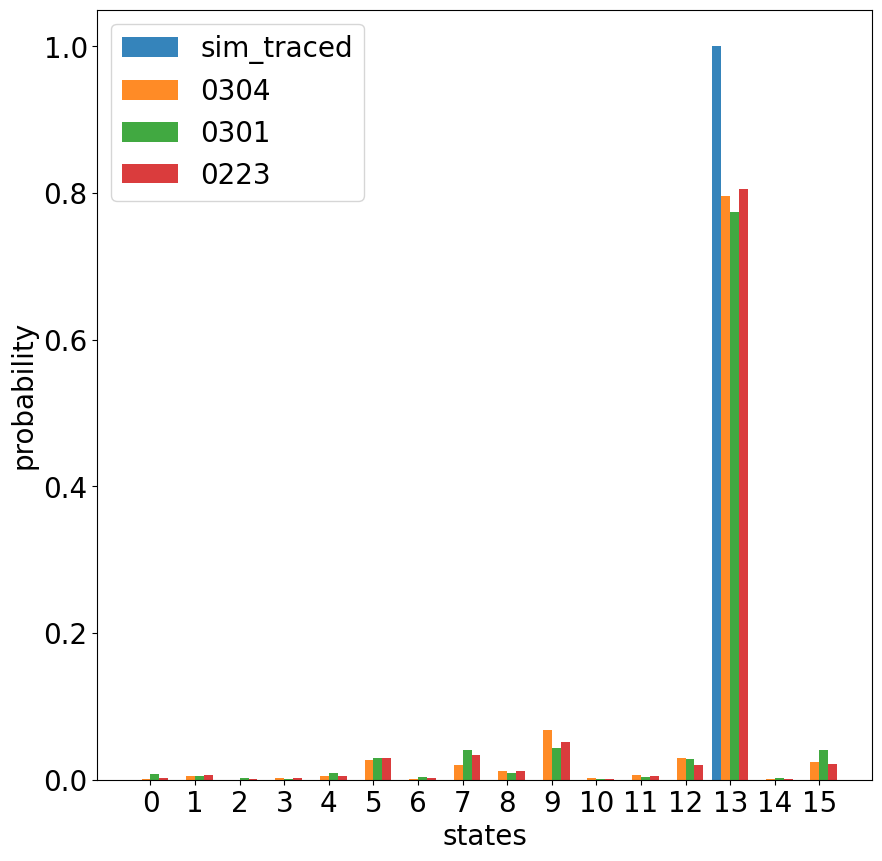

2024-03-04-134415_Line_002.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



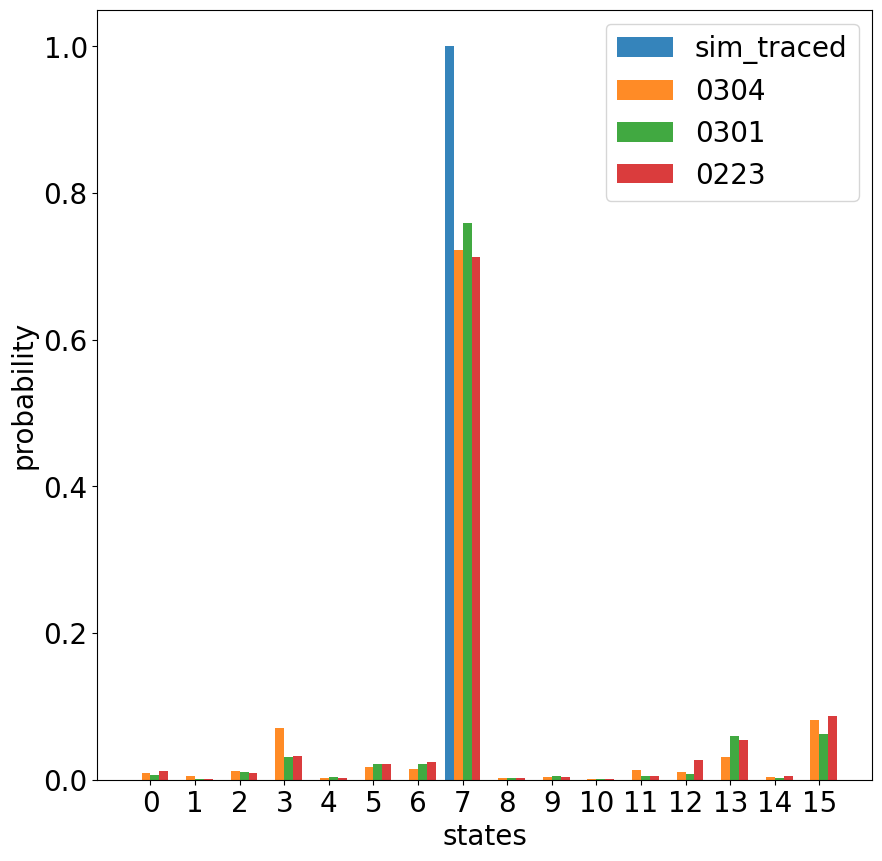

2024-03-04-134441_Line_003.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



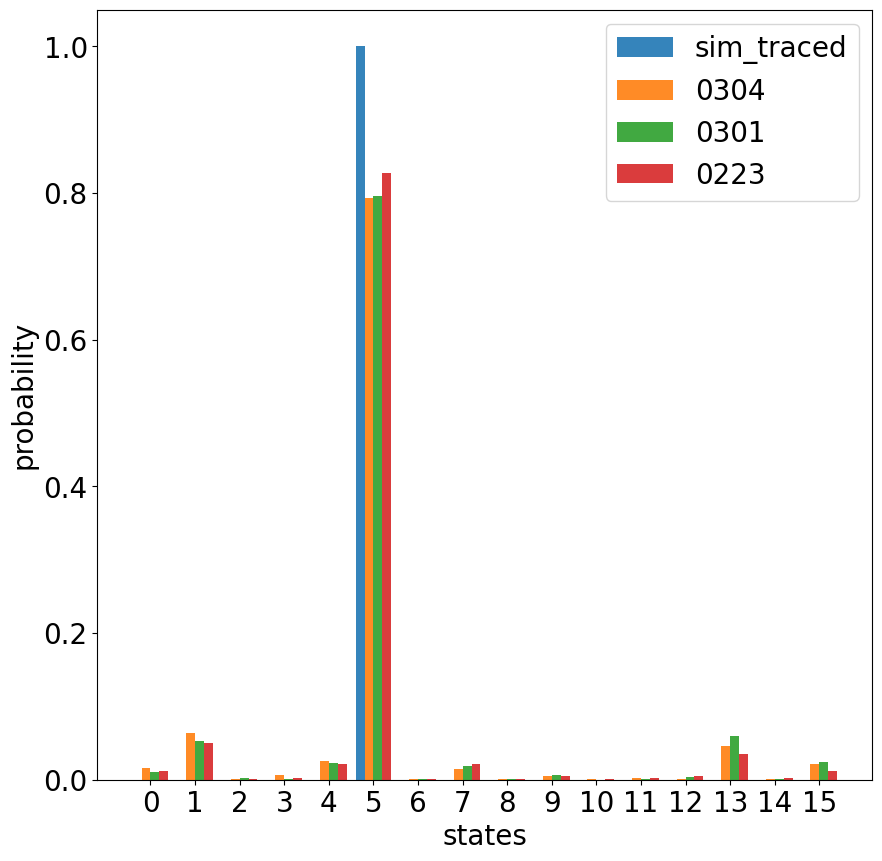

2024-03-04-134507_Line_004.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



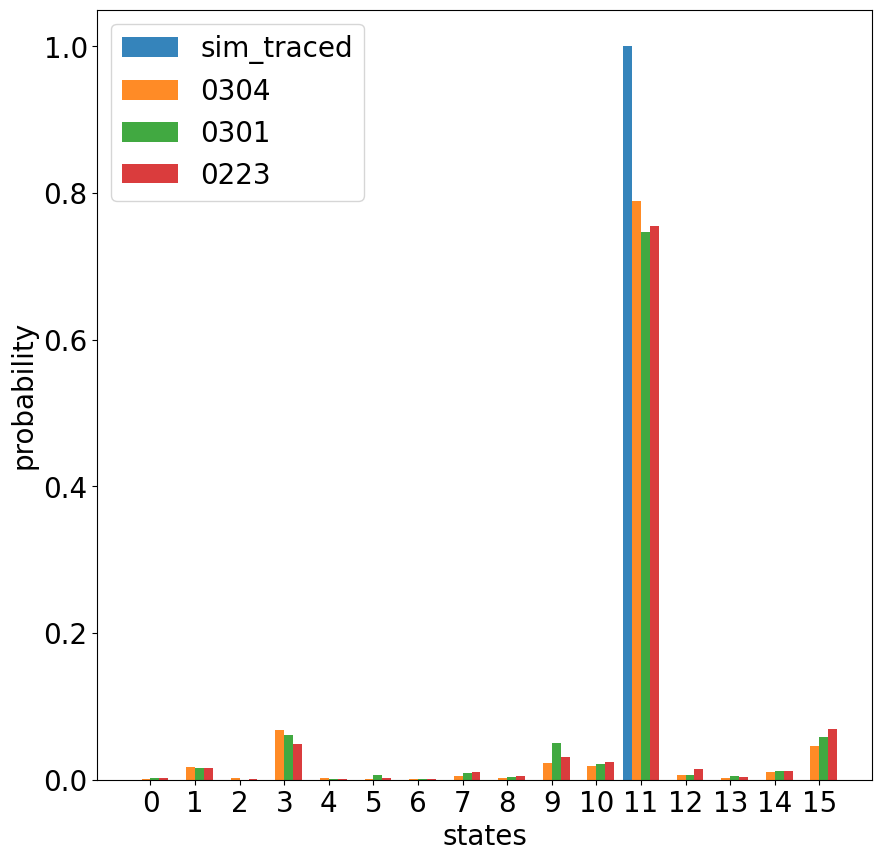

2024-03-04-134533_Line_005.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



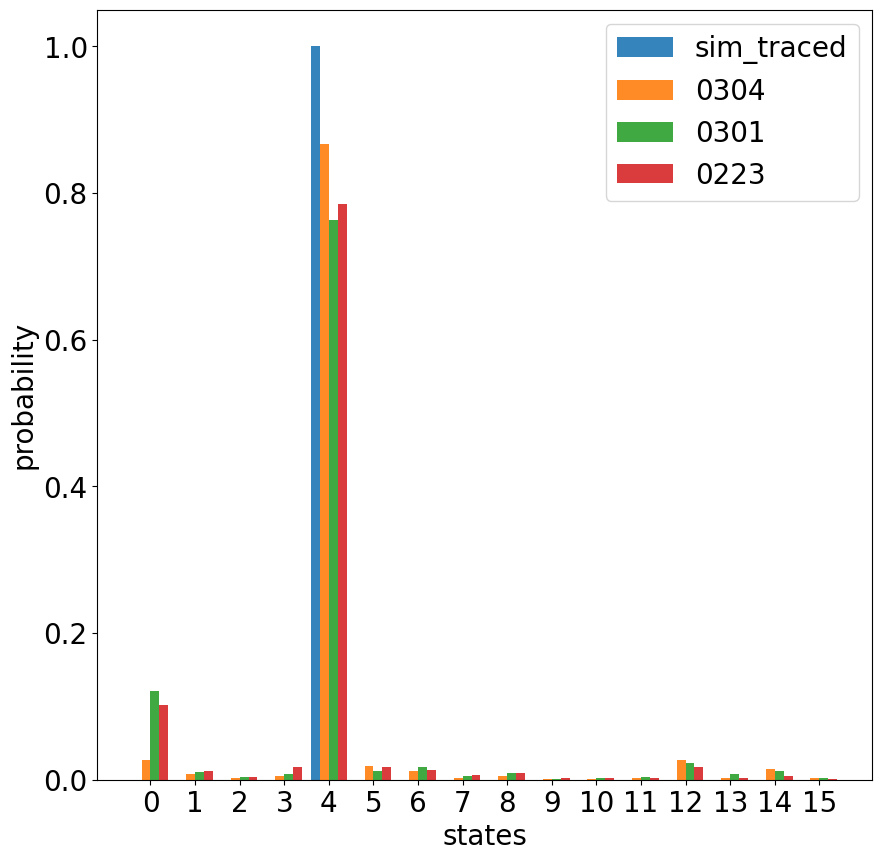

2024-03-04-134656_Line_006.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



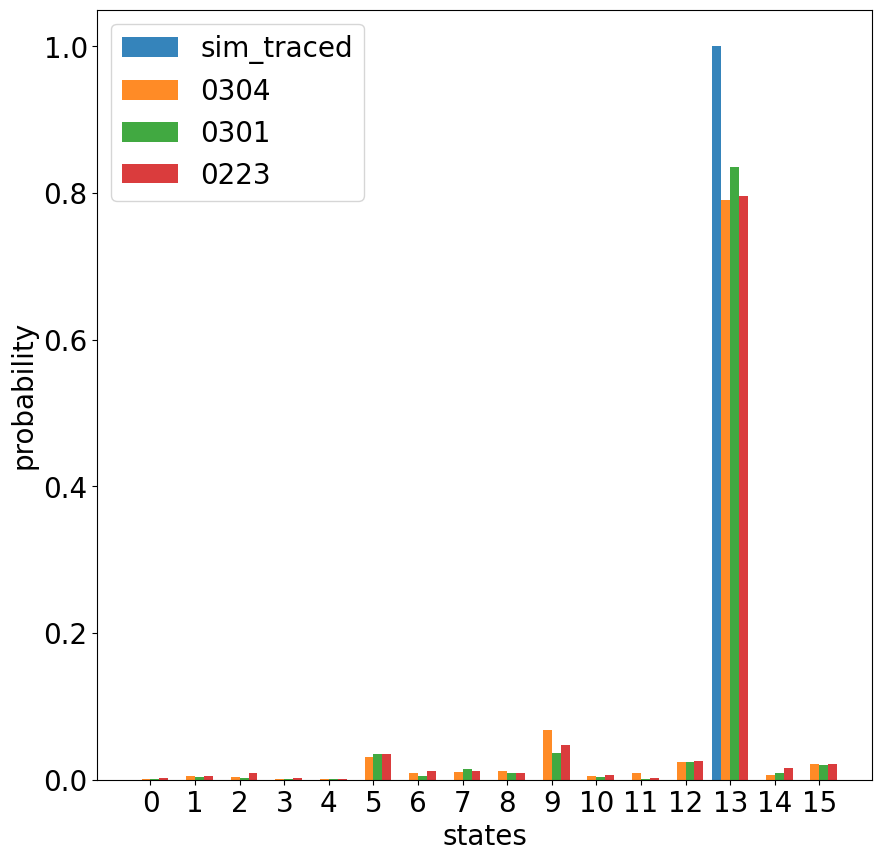

2024-03-04-134721_Line_007.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



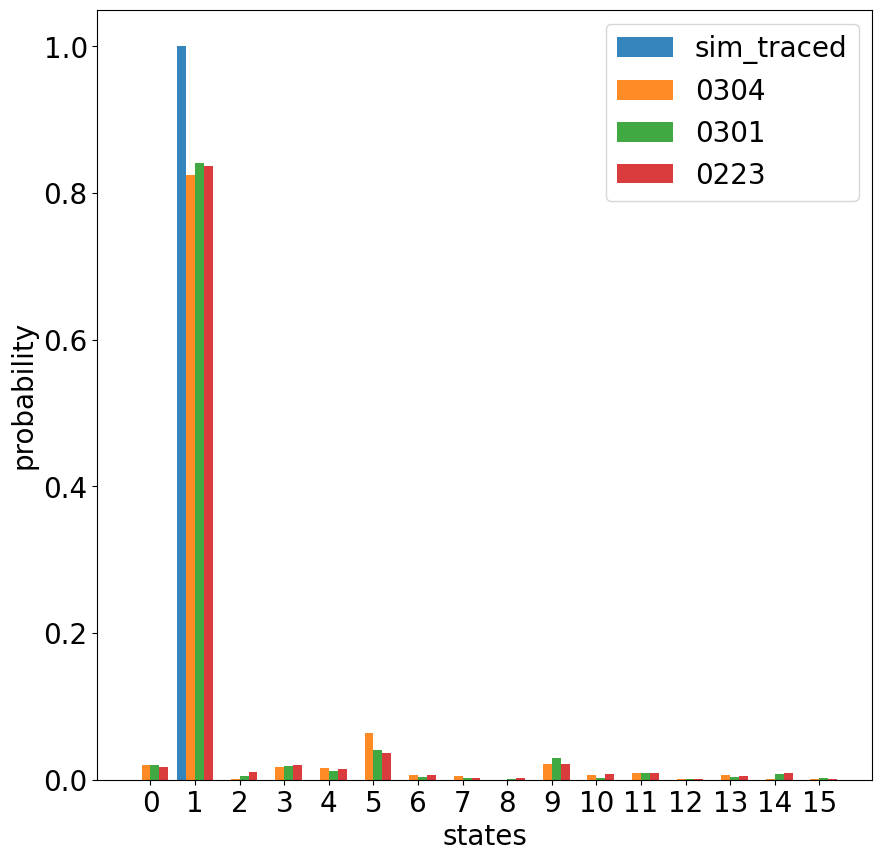

2024-03-04-134747_Line_008.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



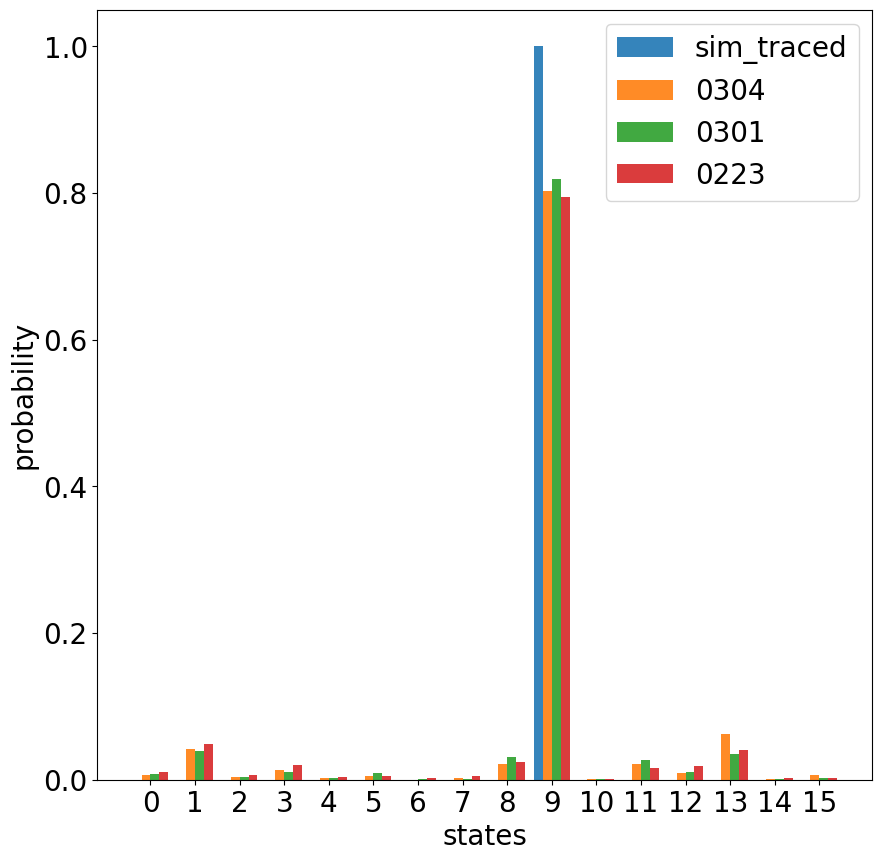

2024-03-04-134813_Line_009.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



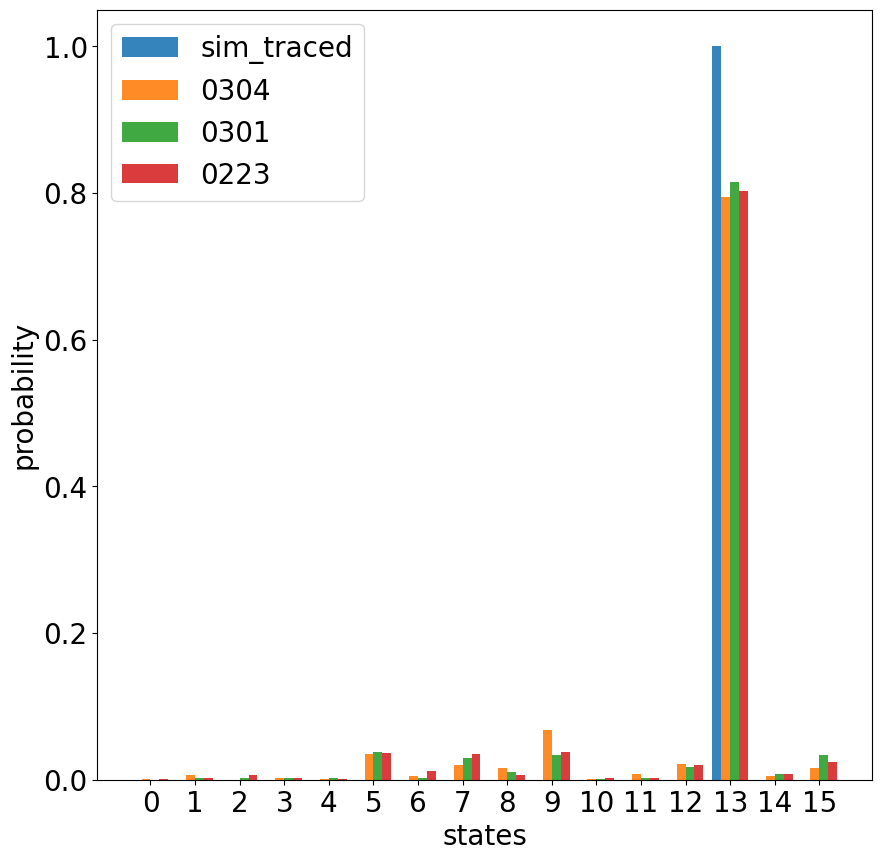

2024-03-04-134839_Line_010.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



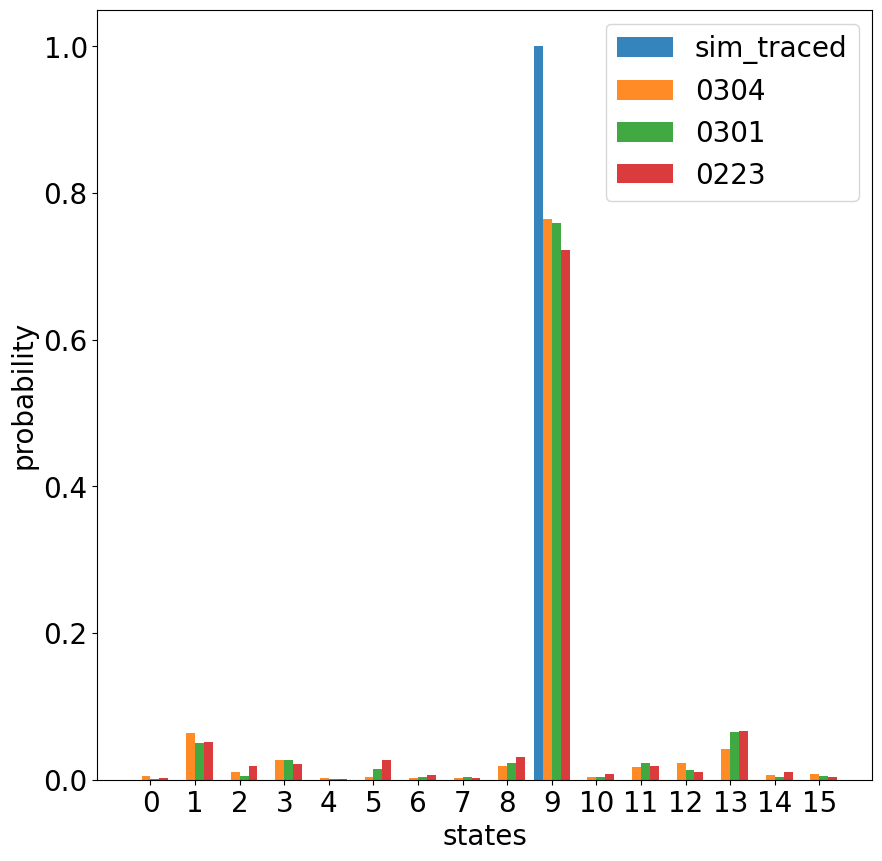

2024-03-04-135002_Line_011.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



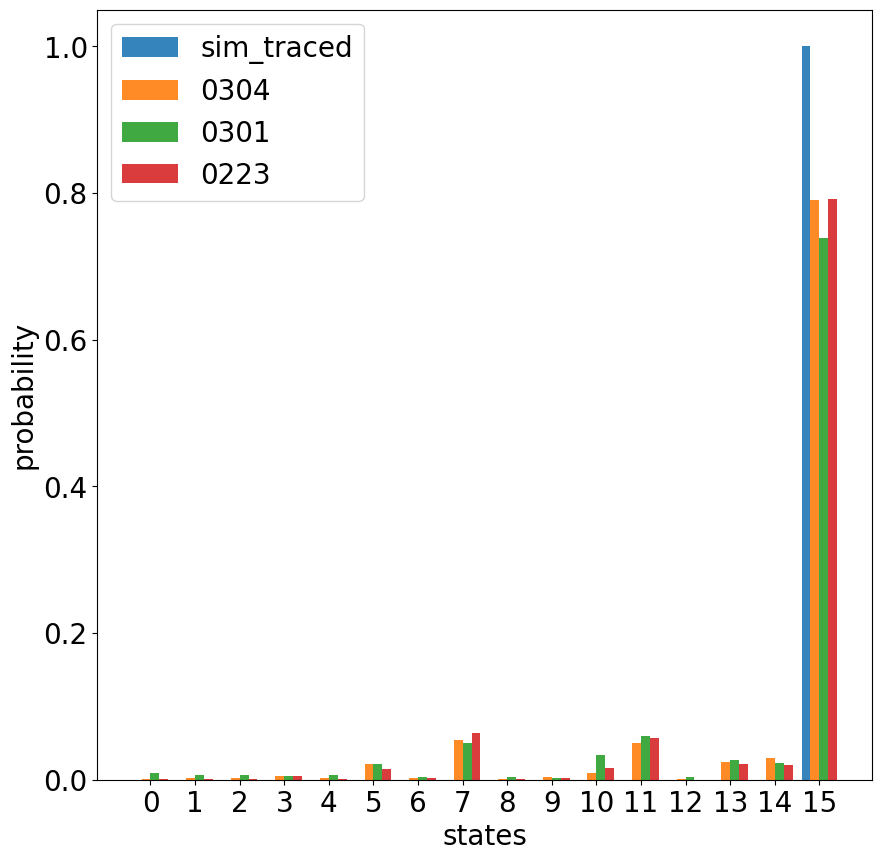

2024-03-04-135027_Line_012.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



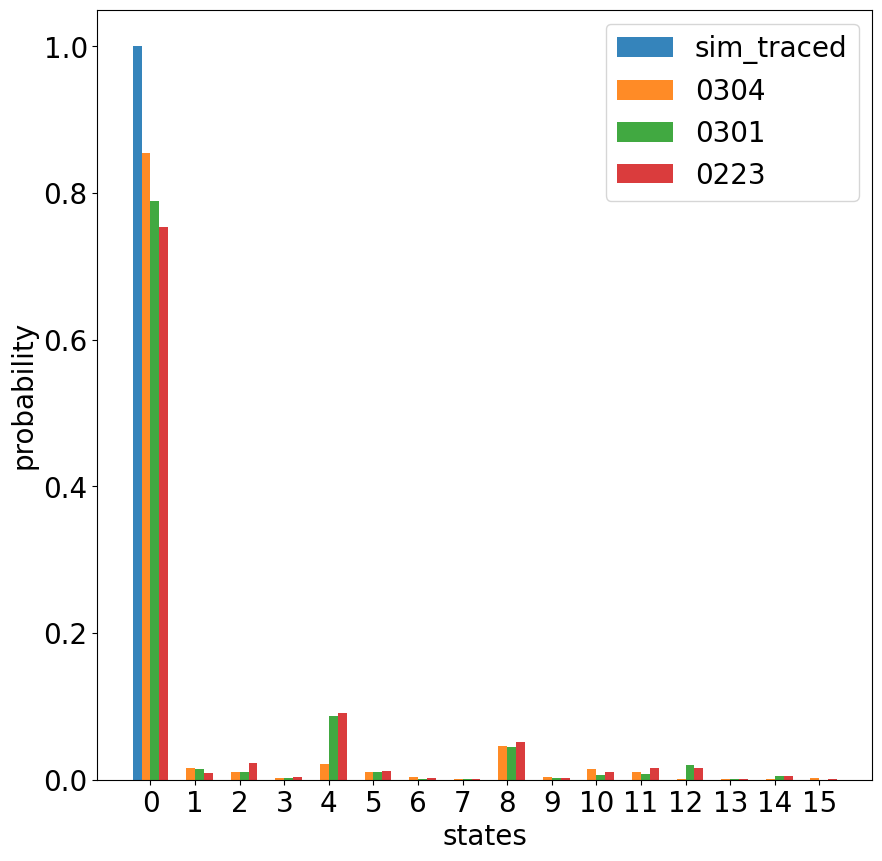

2024-03-04-135053_Line_013.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:FTXA450.2500+:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



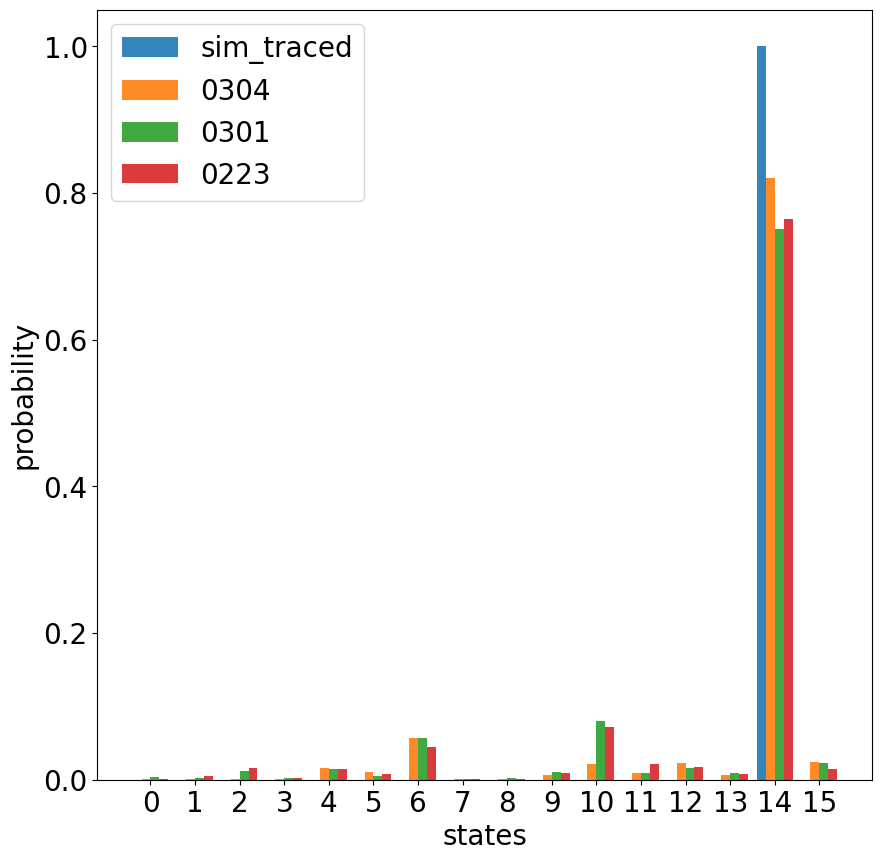

2024-03-04-135119_Line_014.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:FTXA450.2500+:RX+51:FTXA450.2500+:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



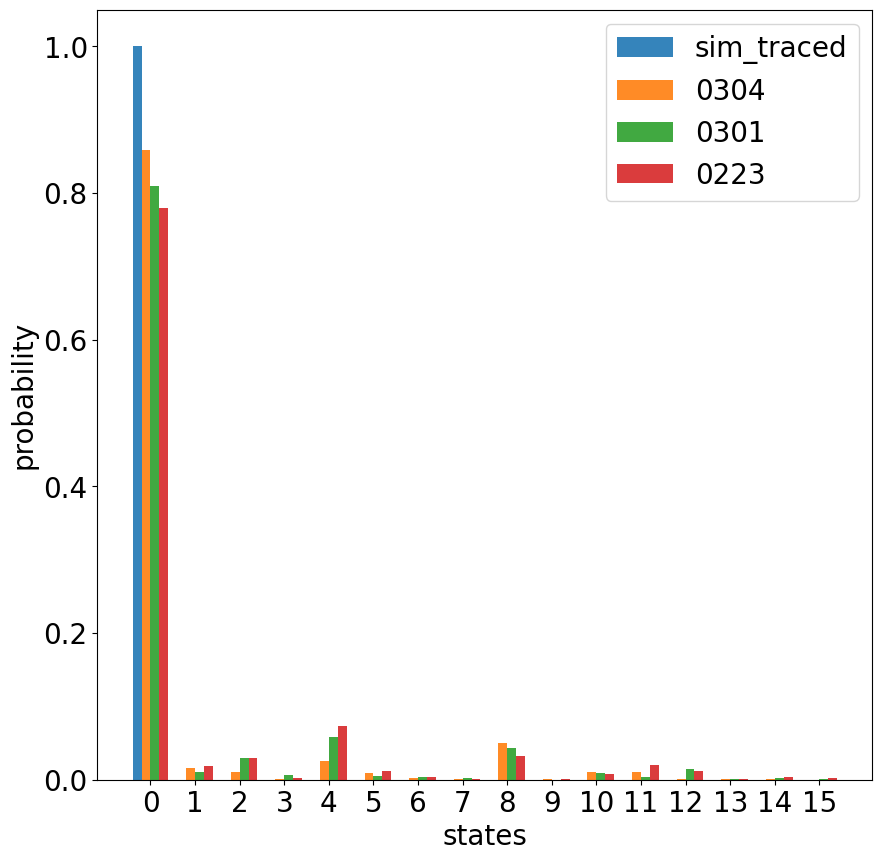

2024-03-04-135145_Line_015.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



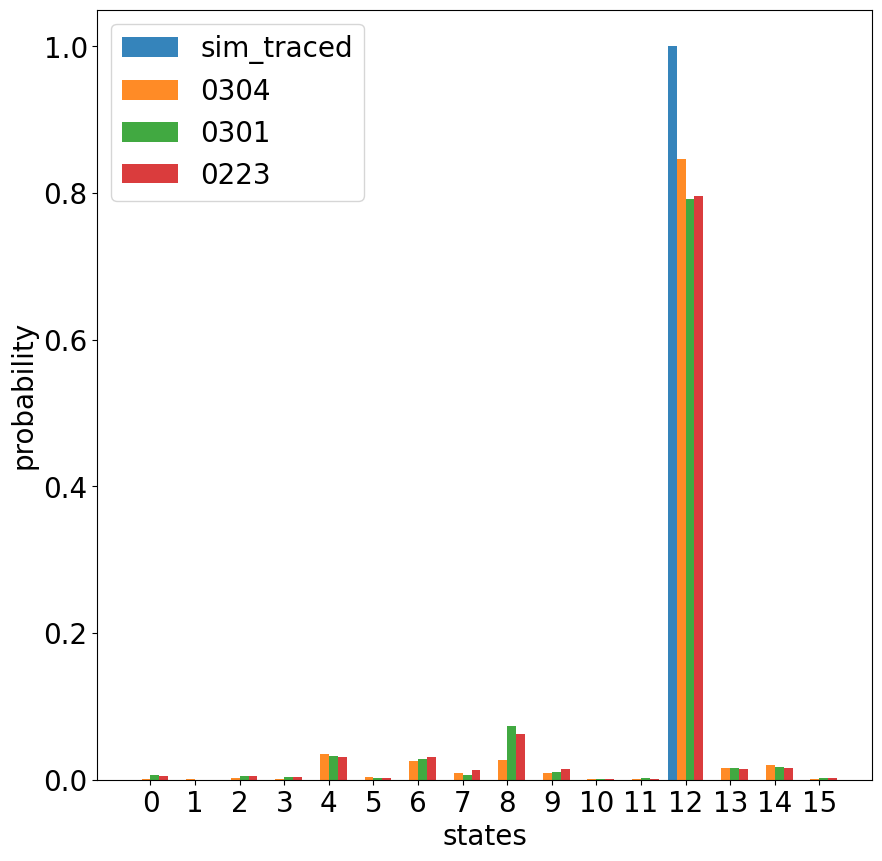

2024-03-04-135306_Line_016.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



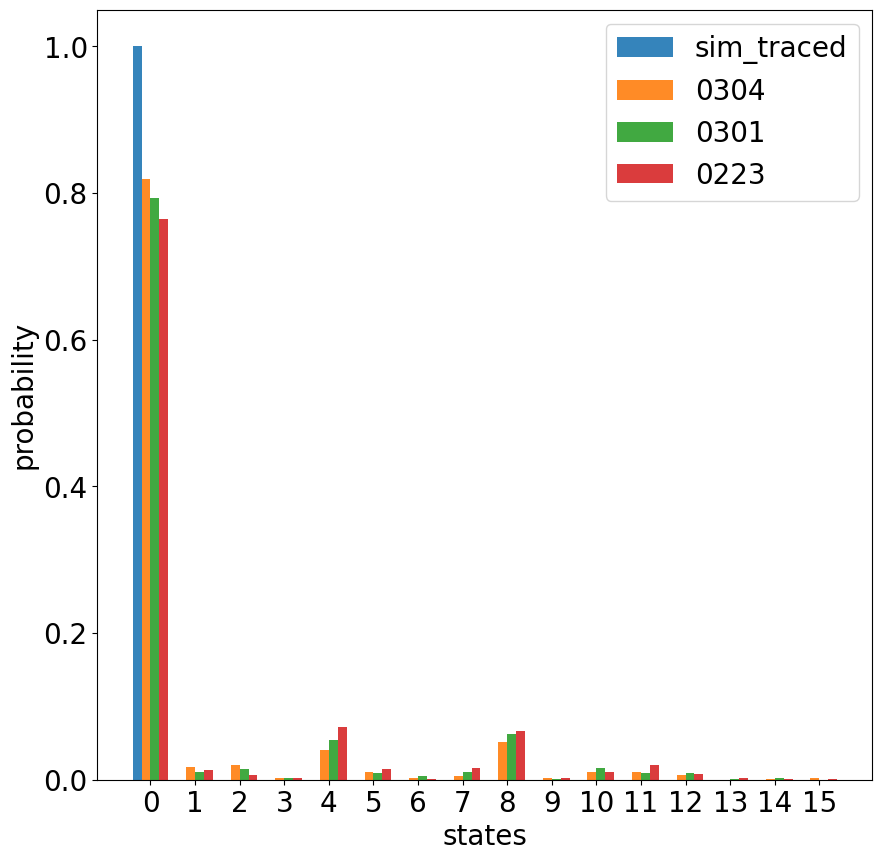

2024-03-04-135332_Line_017.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



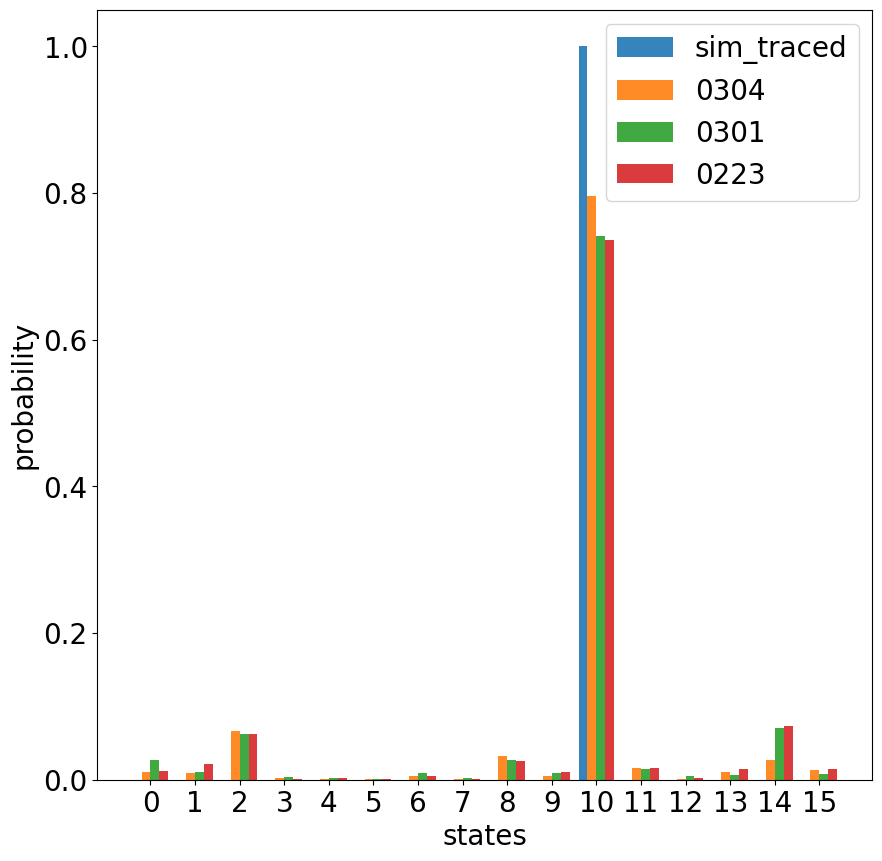

2024-03-04-135358_Line_018.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



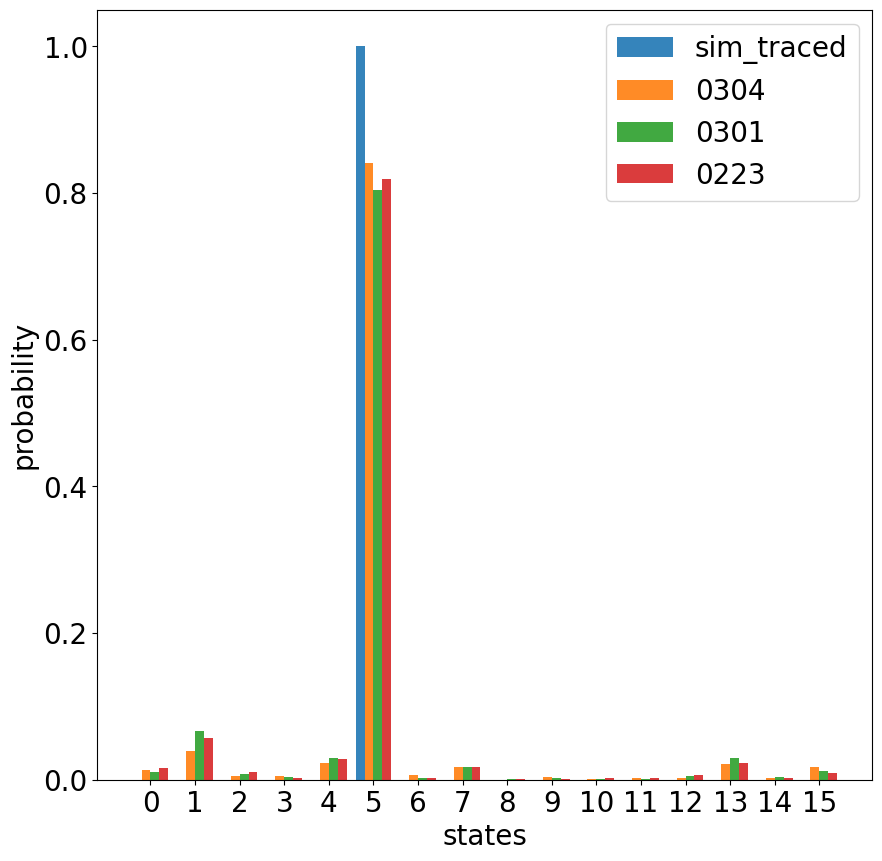

2024-03-04-135423_Line_019.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



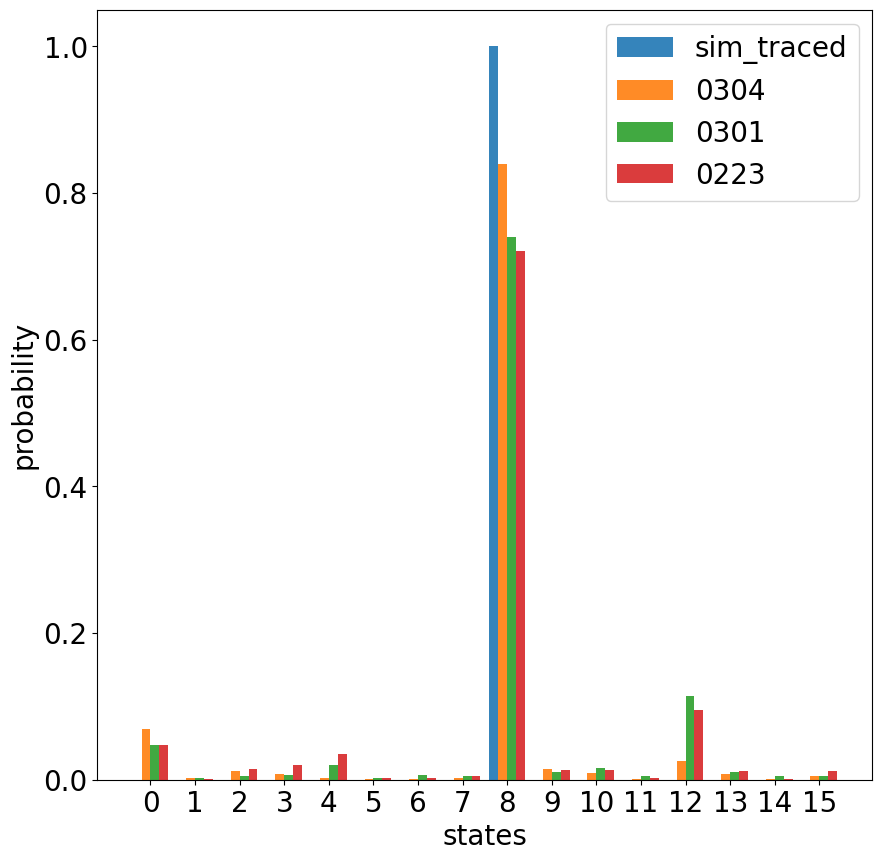

2024-03-04-135449_Line_020.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



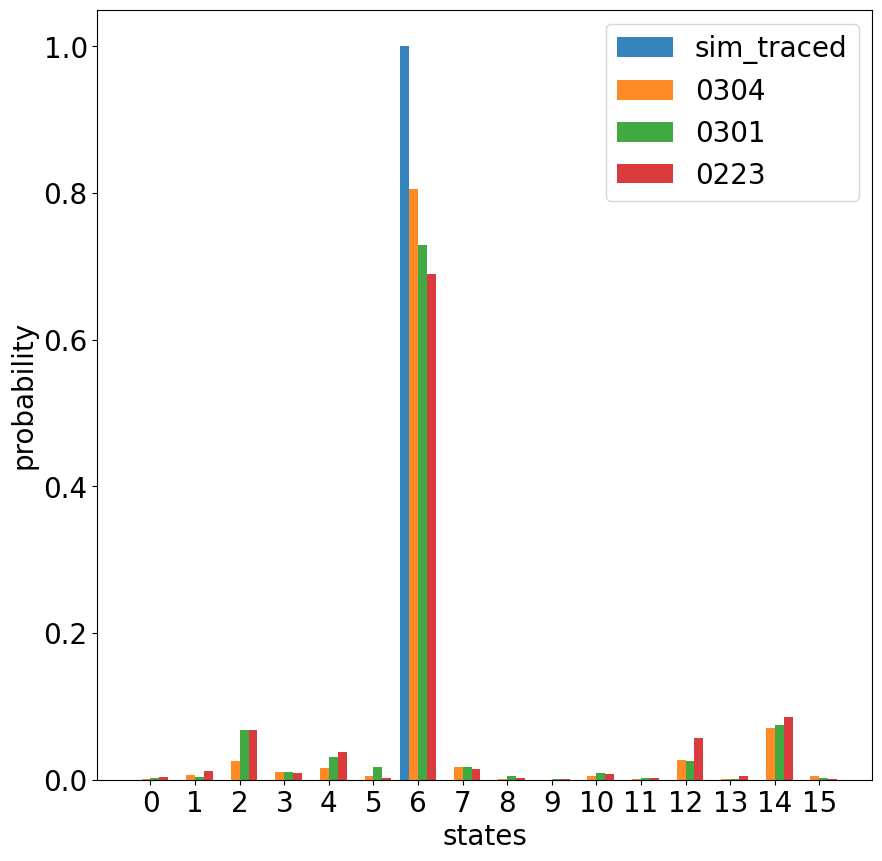

In [26]:
filenames_data=[]
counts_d2=[]
counts_d2_spam=[]
counts_d2_sim=[]
counts=[]
counts_spam=[]
counts_sim=[]
filenames_data=filenames_d2.copy()
# print (filenames_data)
# print (len(filenames_data))
paf_data=paf_data_d2
circuit=c_d2
c=20

for i in range (c):
    
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    # print ("counts:", counts)
    # counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    # print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
    # counts_d2.append(counts_ibm_mapping_dic)
    
#     a_s=spam1.Correct_SPAM(a)
    # a_s=a
    # data_traced_spam=Trace_Out(a_s,[0,1,2,3])
    # counts_spam=[round(shots*x) for x in  data_traced_spam.population]
    # counts_ibm_mapping_spam, counts_ibm_mapping_dic_spam=map_statepop_2_ibm_mapping(counts_spam,nqubit)
    # counts_d2_spam.append(counts_ibm_mapping_dic_spam)
    
    #0301
    a_comp.Import(paf_data_d2_comp+filenames_d2_comp[i],keep_file=True)
    data_traced_comp=Trace_Out(a_comp,[0,1,2,3])
     #0223
    a_comp2.Import(paf_data_d2_comp2+filenames_d2_comp2[i],keep_file=True)
    data_traced_comp2=Trace_Out(a_comp2,[0,1,2,3])


    b_c.Interpret_GatesLab_Sequence(circuit[i])
    print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    # counts_sim=[round(shots*x) for x in sim_traced.population]
    # counts_ibm_mapping_sim, counts_ibm_mapping_dic_sim=map_statepop_2_ibm_mapping(counts_sim,nqubit)
    # counts_d2_sim.append(counts_ibm_mapping_dic_sim)
    
    
    # Display_States_Population(states=[b,a,a_s],label=["simulation","d=2","spam"])
    Display_States_Population(states=[sim_traced,data_traced,data_traced_comp,data_traced_comp2],label=["sim_traced","0304","0301","0223"])
# #       


In [33]:
# filenames_data=[]
# counts_d8=[]
# counts_d8_spam=[]
# counts=[]
# counts_spam=[]
# filenames_data=filenames_d8.copy()
# # print (filenames_data)
# # # print (len(filenames_data))
# paf_data=paf_data_d8
# circuit=c_d8
# for i in range (len(filenames_data)):
#     print (filenames_data[i])
#     a.Import(paf_data+filenames_data[i],keep_file=True)
#     data_traced=Trace_Out(a,[0,1,2,3])
#     counts=[round(shots*x) for x in  data_traced.population]
#     counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
#     counts_d8.append(counts_ibm_mapping_dic)
    
# #     a_s=spam1.Correct_SPAM(a)
# #     data_traced_spam=Trace_Out(a_s,[0,1,2,3])
# #     counts_spam=[round(shots*x) for x in  data_traced_spam.population]
# #     counts_ibm_mapping_spam, counts_ibm_mapping_dic_spam=map_statepop_2_ibm_mapping(counts_spam,nqubit)
# #     counts_d8_spam.append(counts_ibm_mapping_dic_spam)
    
# #     a_0703.Import(paf_data_d8_0703+filenames_d8_0703[i],keep_file=True)
# #     data_0703_traced=Trace_Out(a_0703,[0,1,2,3])
    
#     b_c.Interpret_GatesLab_Sequence(circuit[i])
#     print (circuit[i])
#     b=b_c.Simulate()
#     sim_traced=Trace_Out(b,[0,1,2,3])
# #     Display_States_Population(states=[b,a,a_s],label=["simulation","d=8","spam"])
#     Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])

In [5]:
print (filenames_d32)


NameError: name 'filenames_d32' is not defined

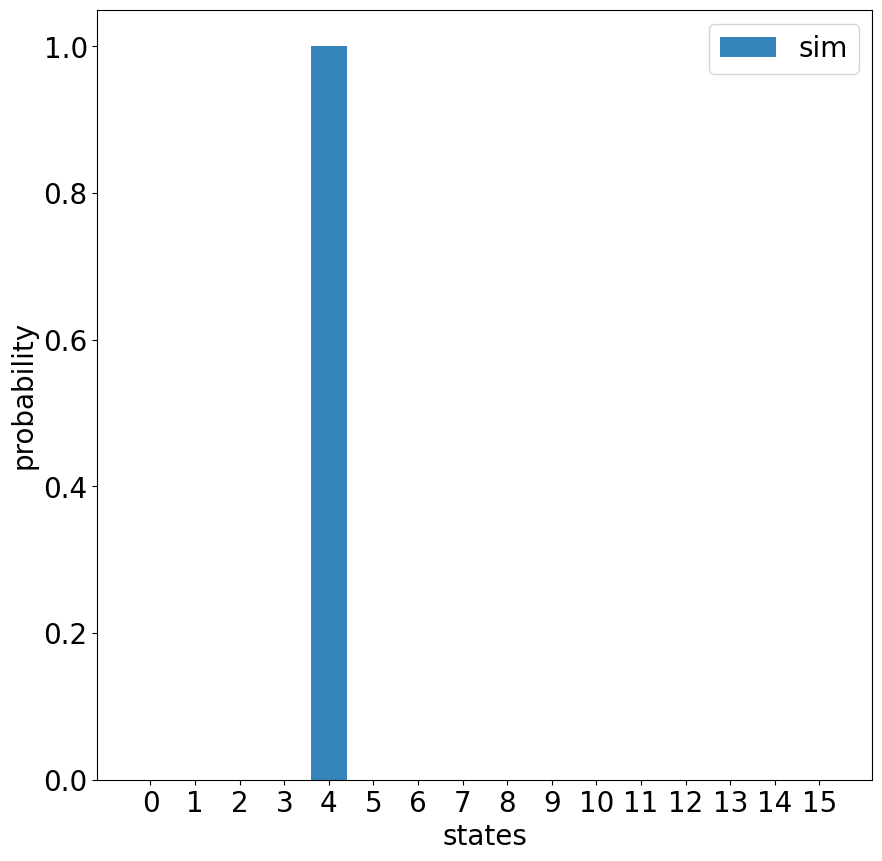

2024-03-04-132728_Line_002.txt


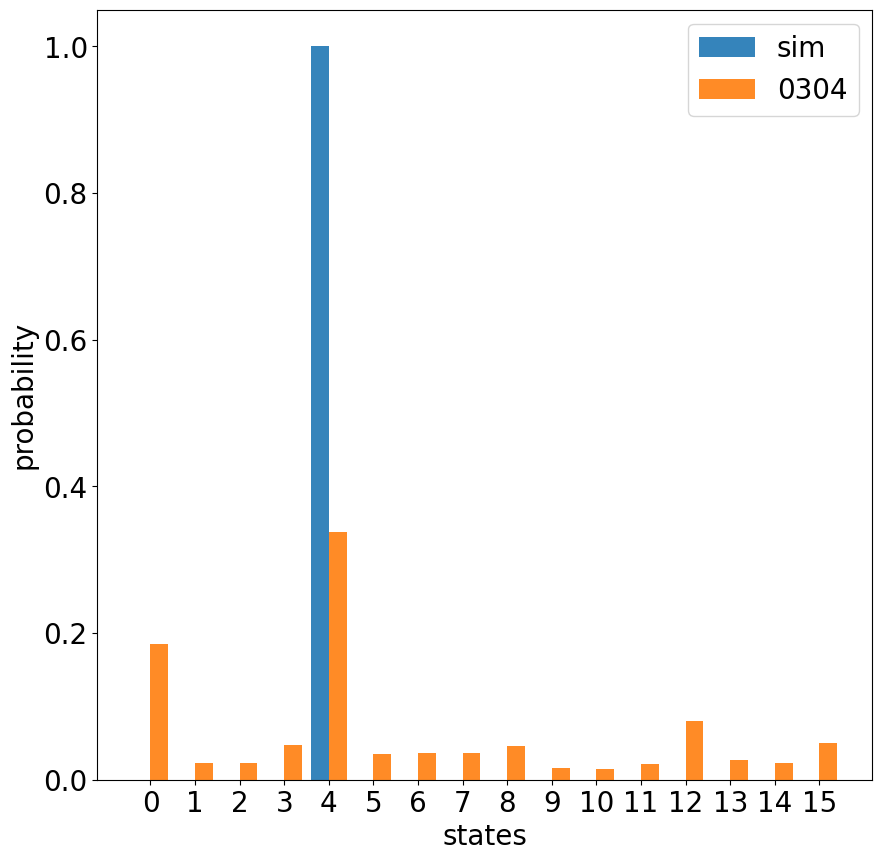

2024-03-04-132920_Line_003.txt


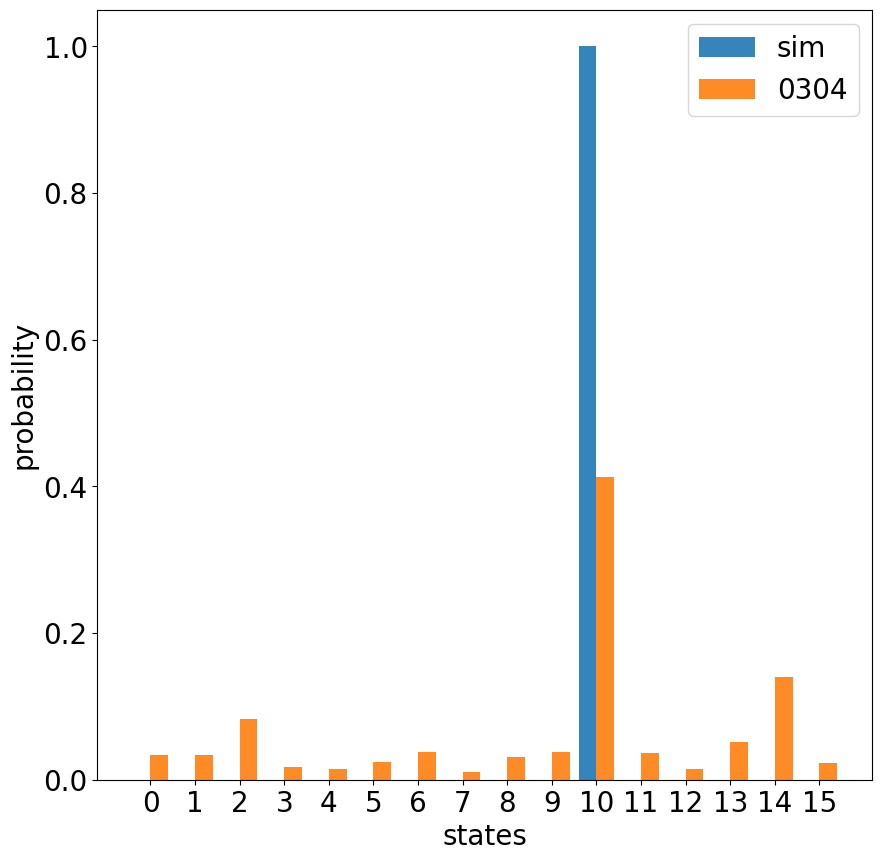

2024-03-04-211752_Line_004.txt


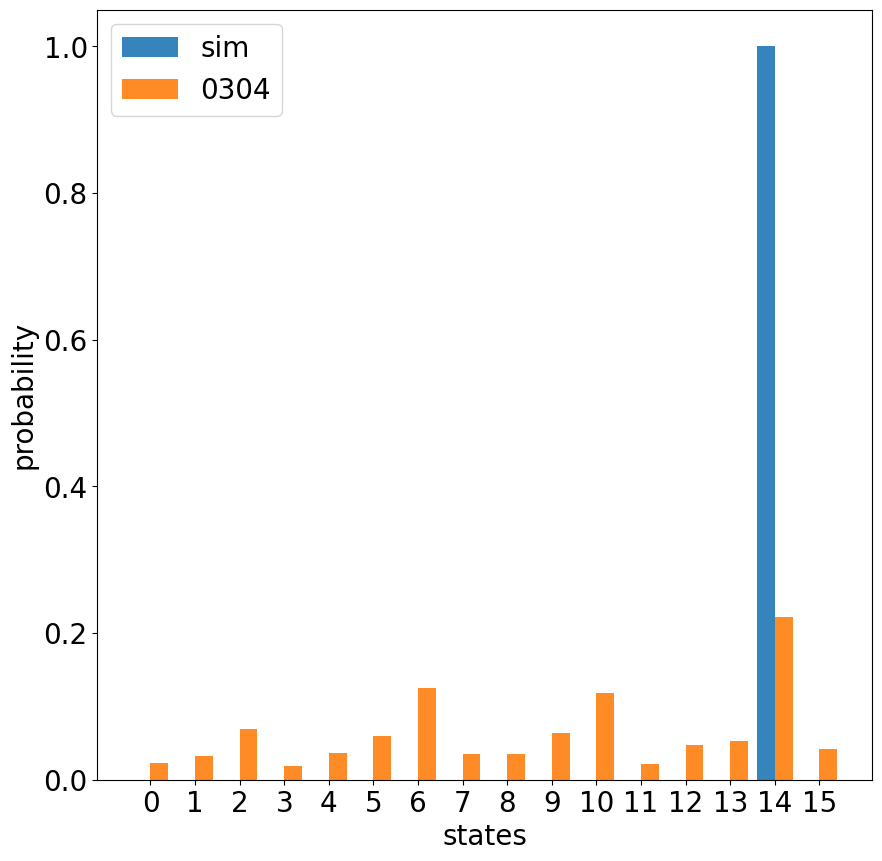

2024-03-04-211943_Line_005.txt


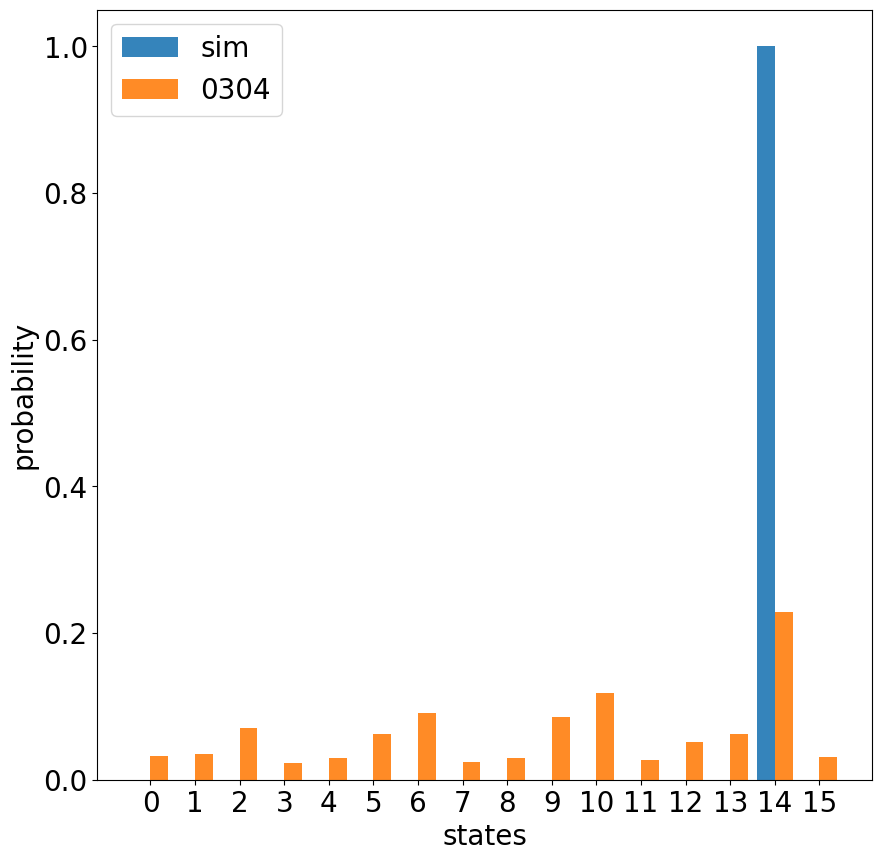

2024-03-04-212138_Line_006.txt


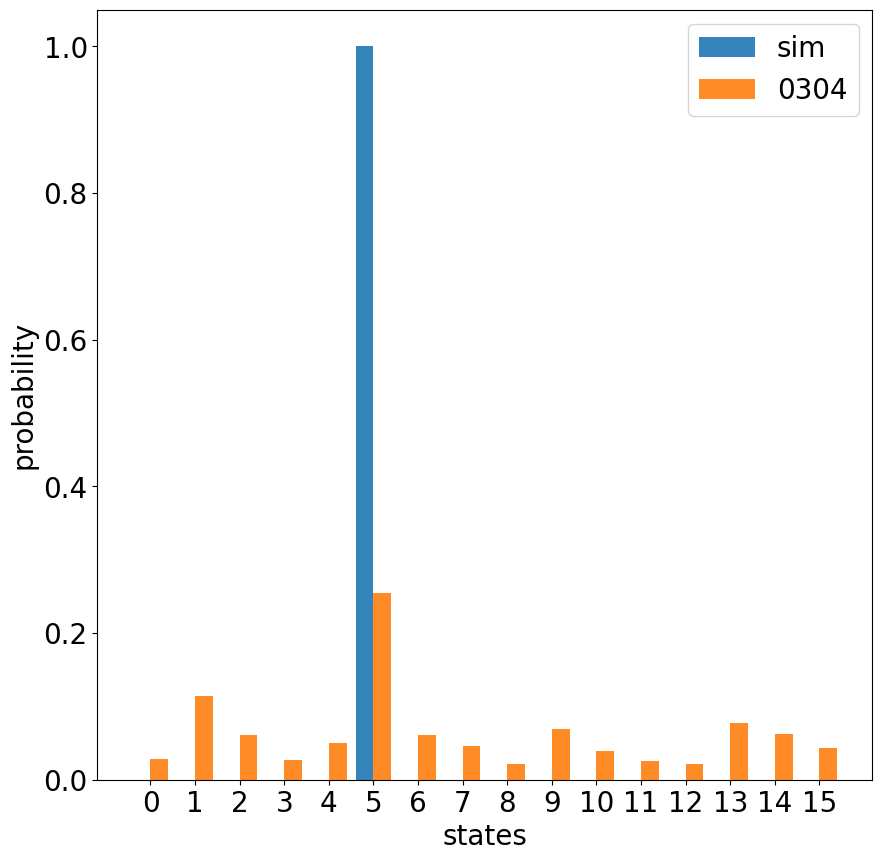

2024-03-04-212326_Line_007.txt


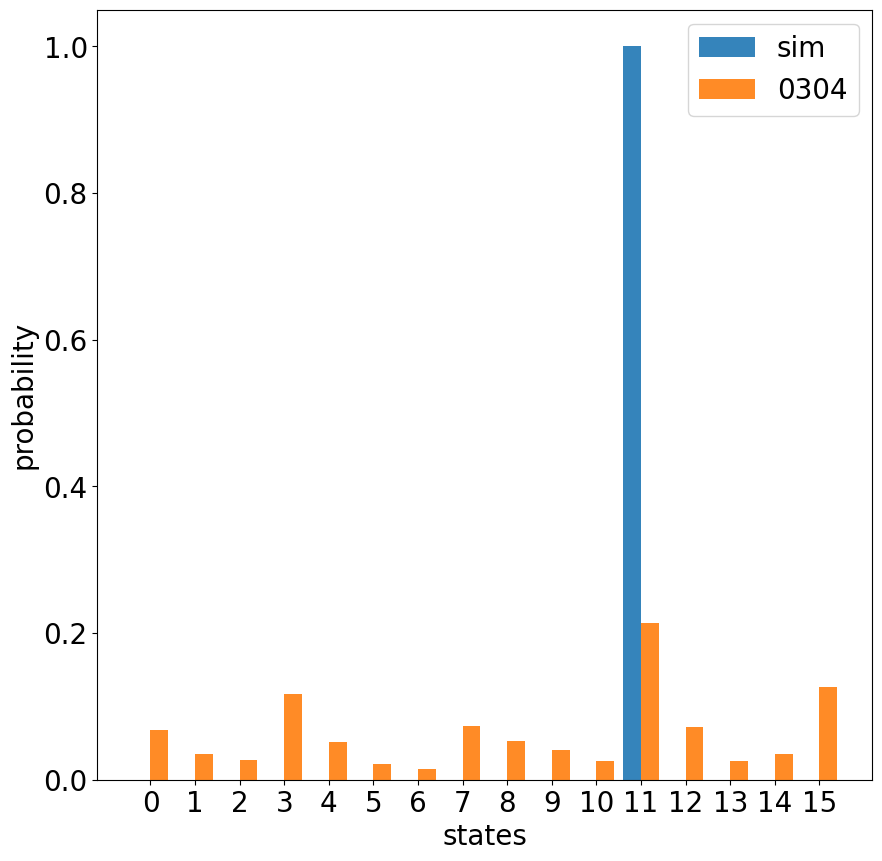

2024-03-04-212619_Line_008.txt


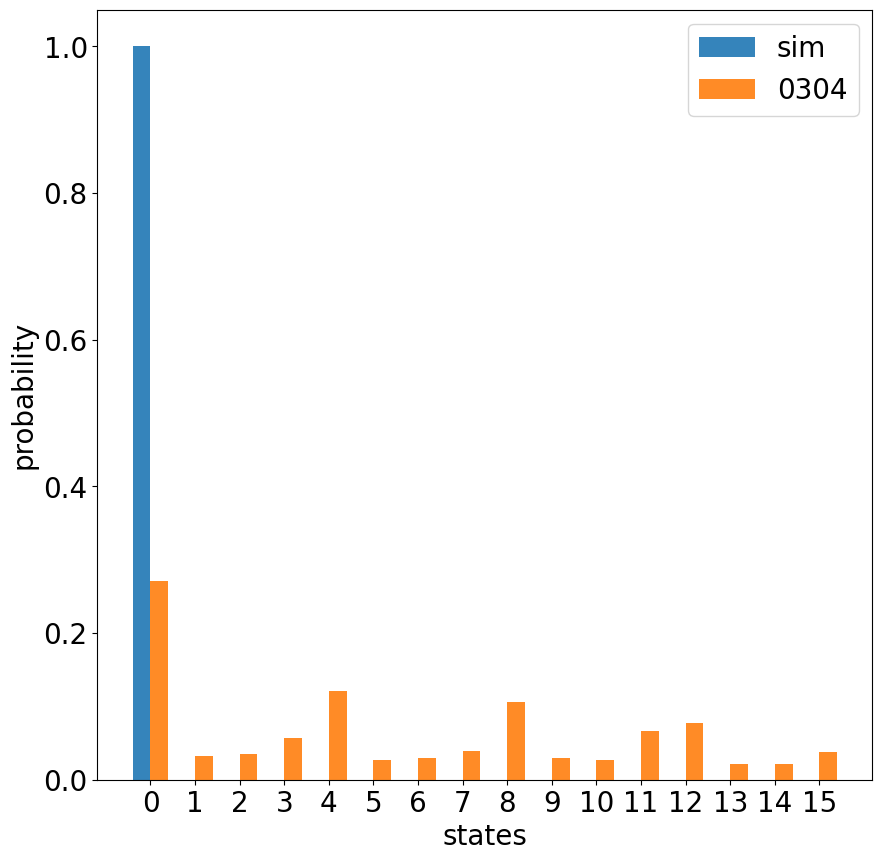

2024-03-04-212810_Line_009.txt


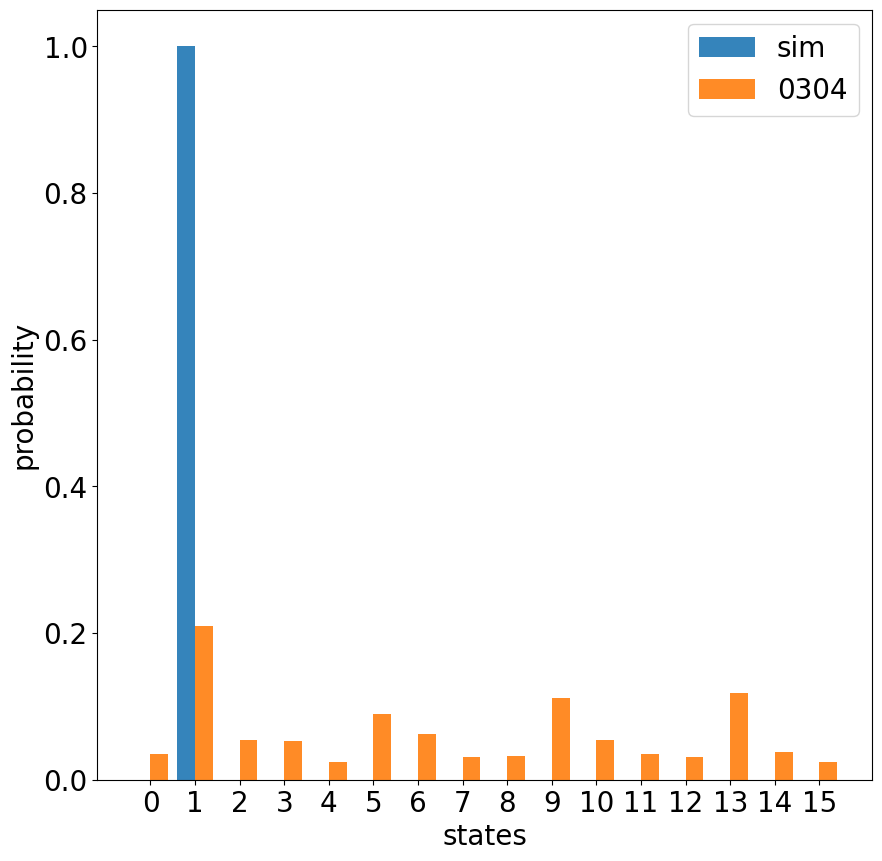

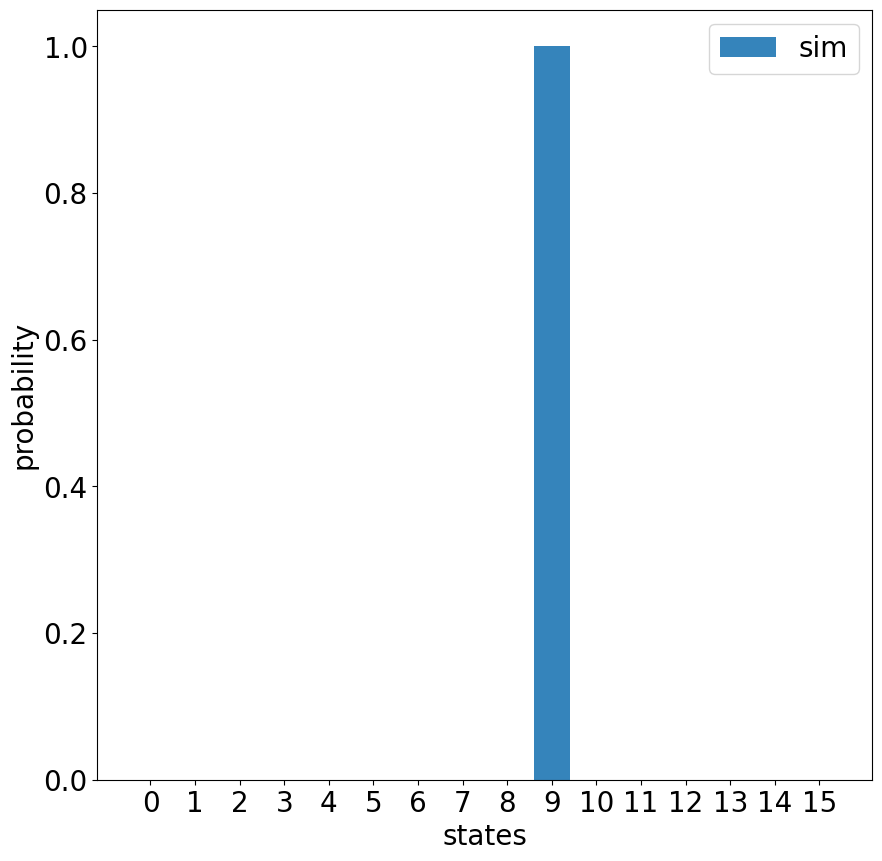

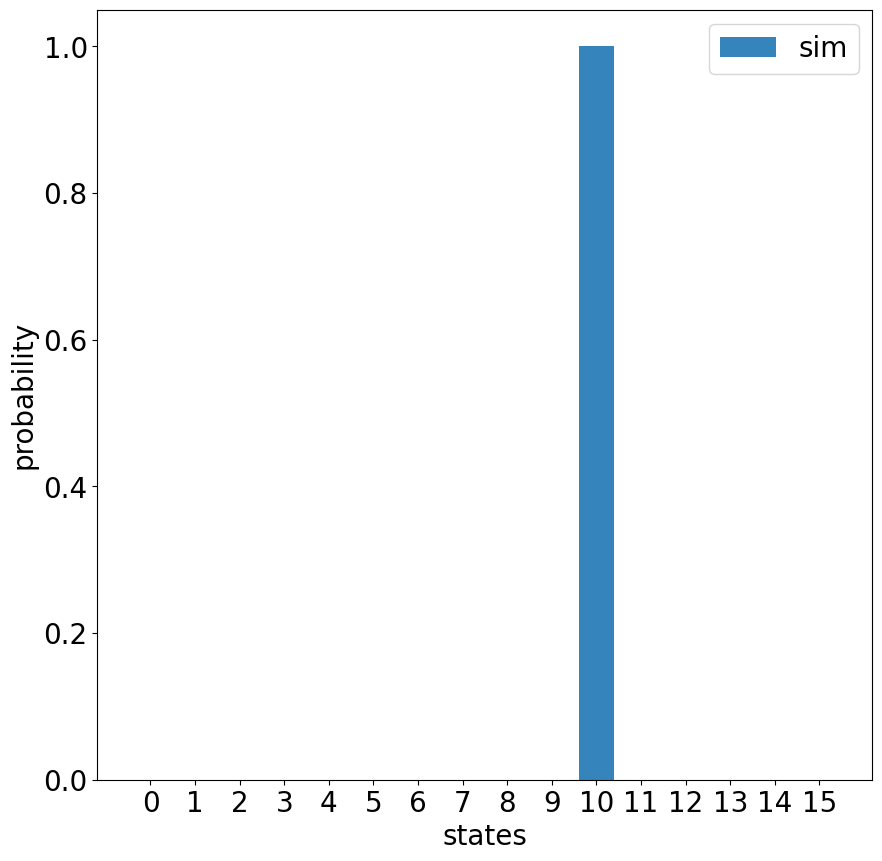

2024-03-04-114459_Line_012.txt


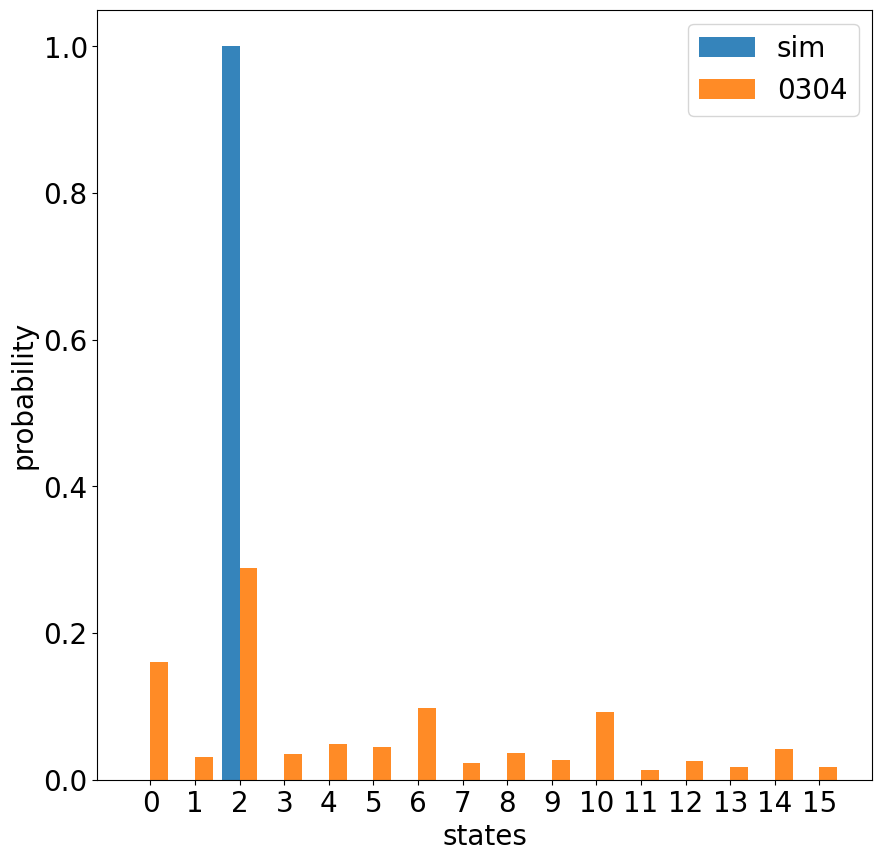

2024-03-04-114650_Line_013.txt


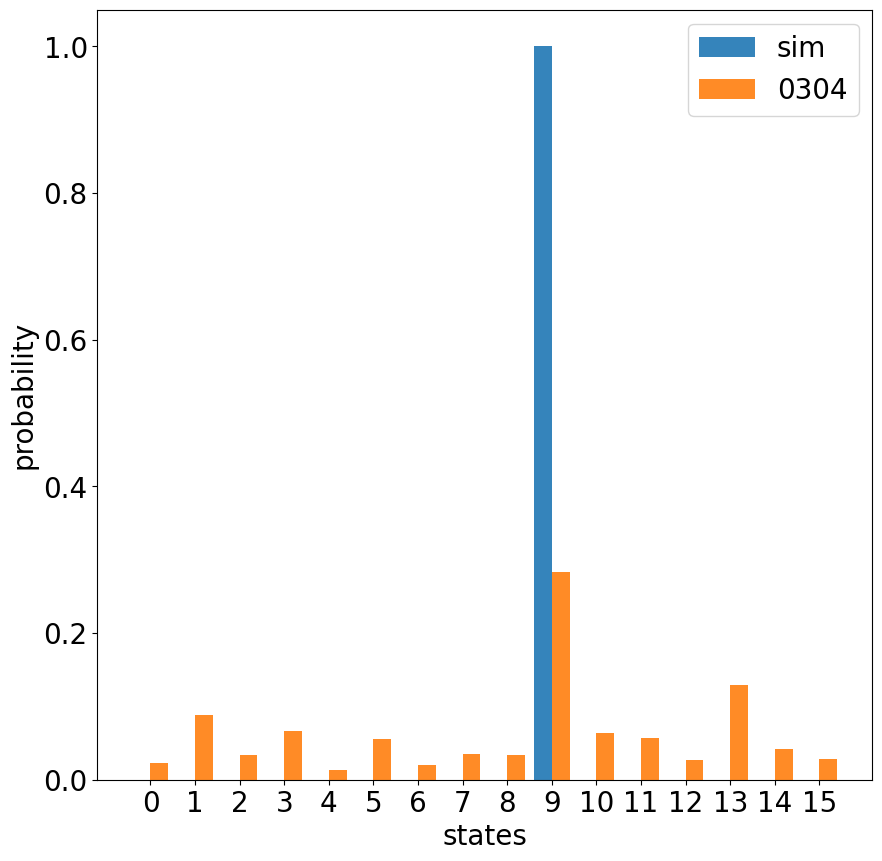

2024-03-04-114840_Line_014.txt


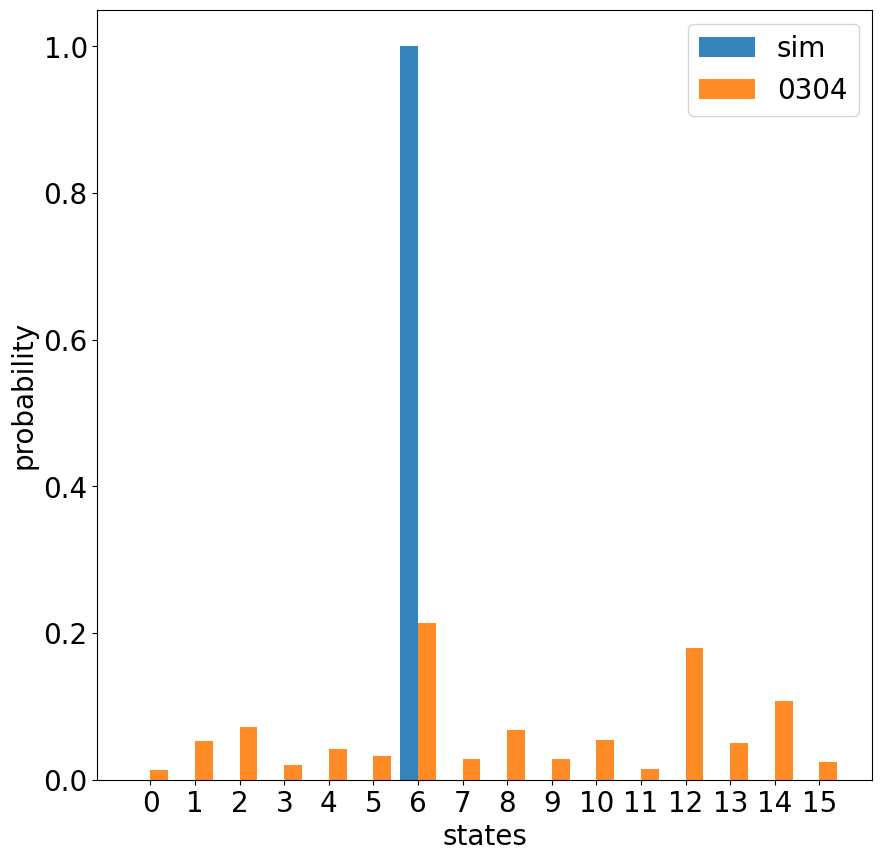

2024-03-04-115035_Line_015.txt


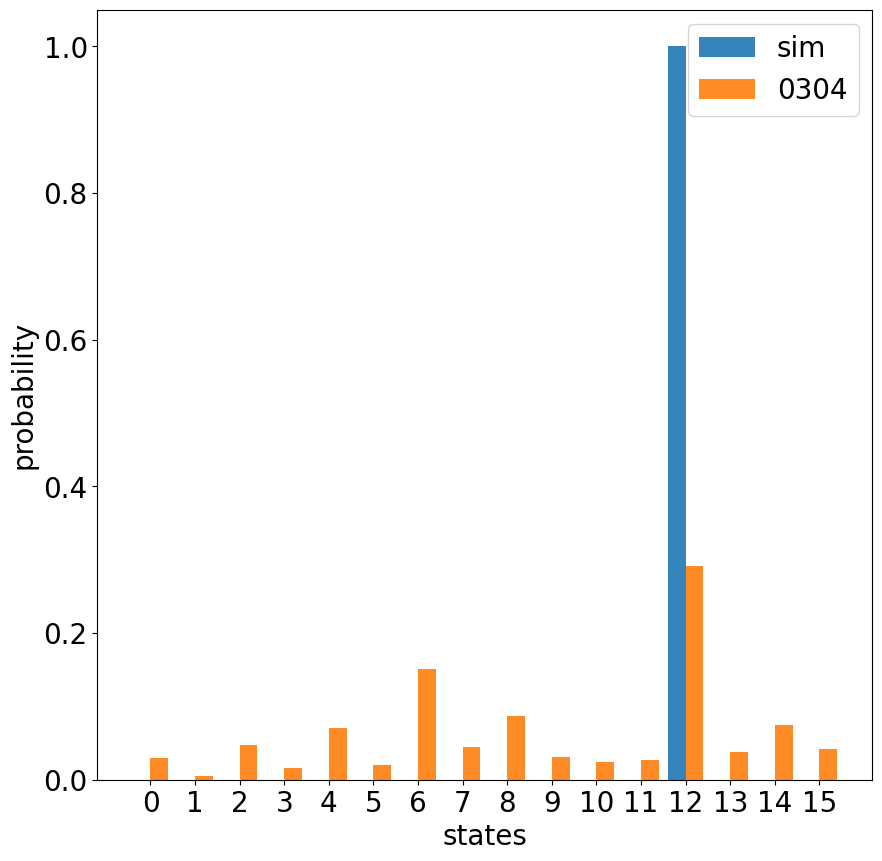

2024-03-04-115324_Line_016.txt


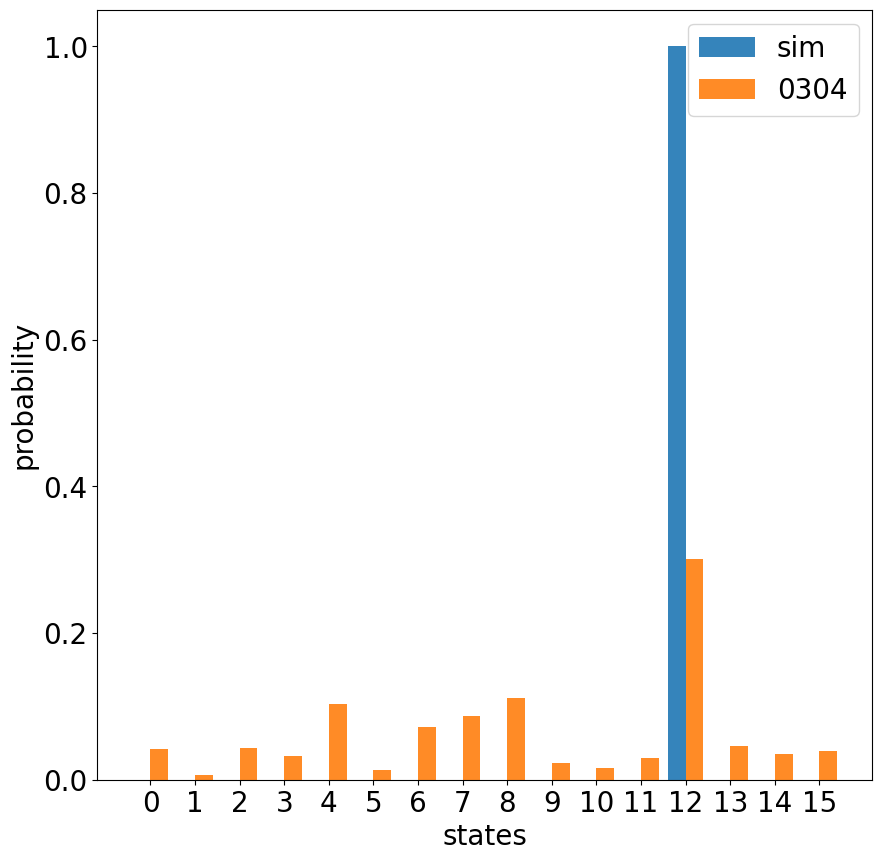

2024-03-04-115517_Line_017.txt


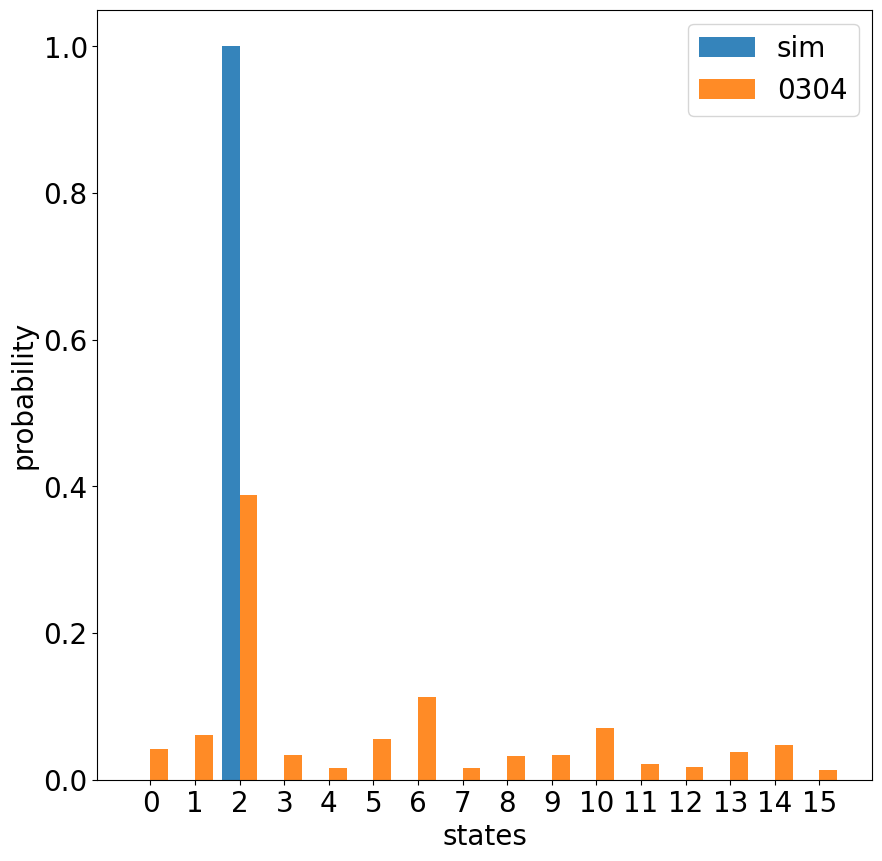

2024-03-04-115710_Line_018.txt


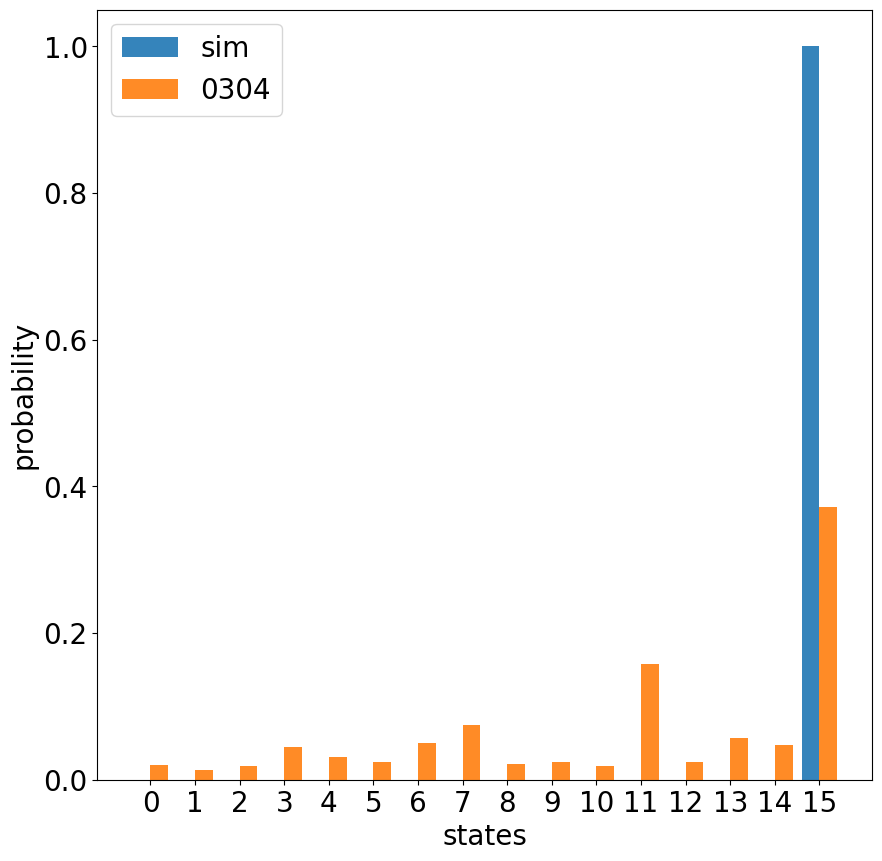

2024-03-04-115904_Line_019.txt


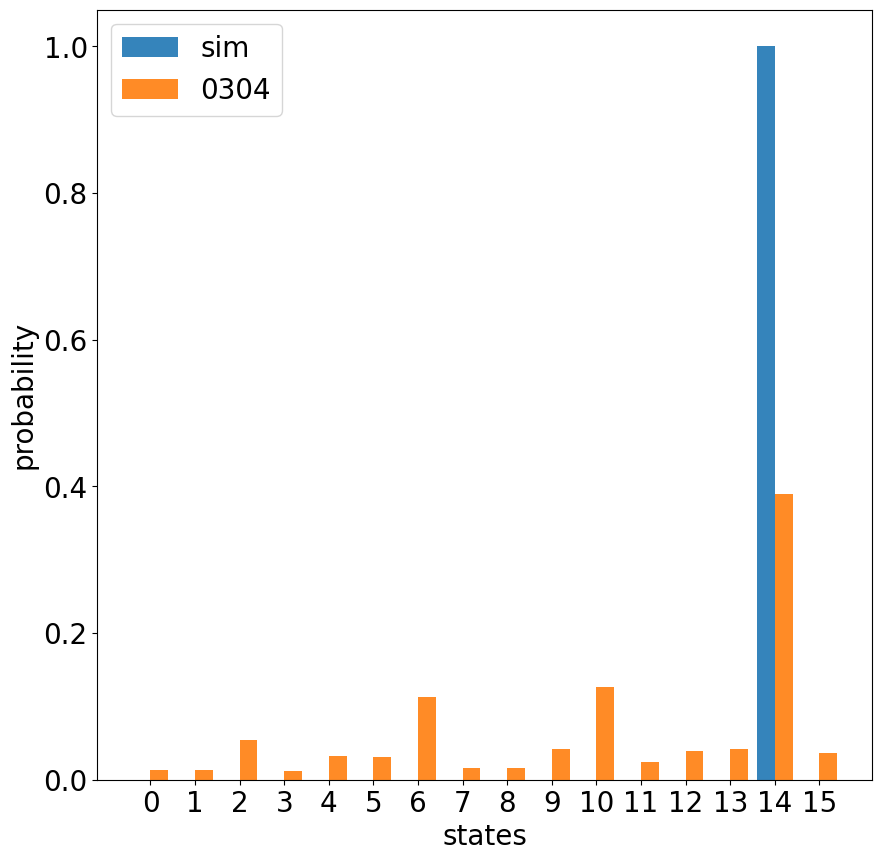

2024-03-04-120152_Line_020.txt


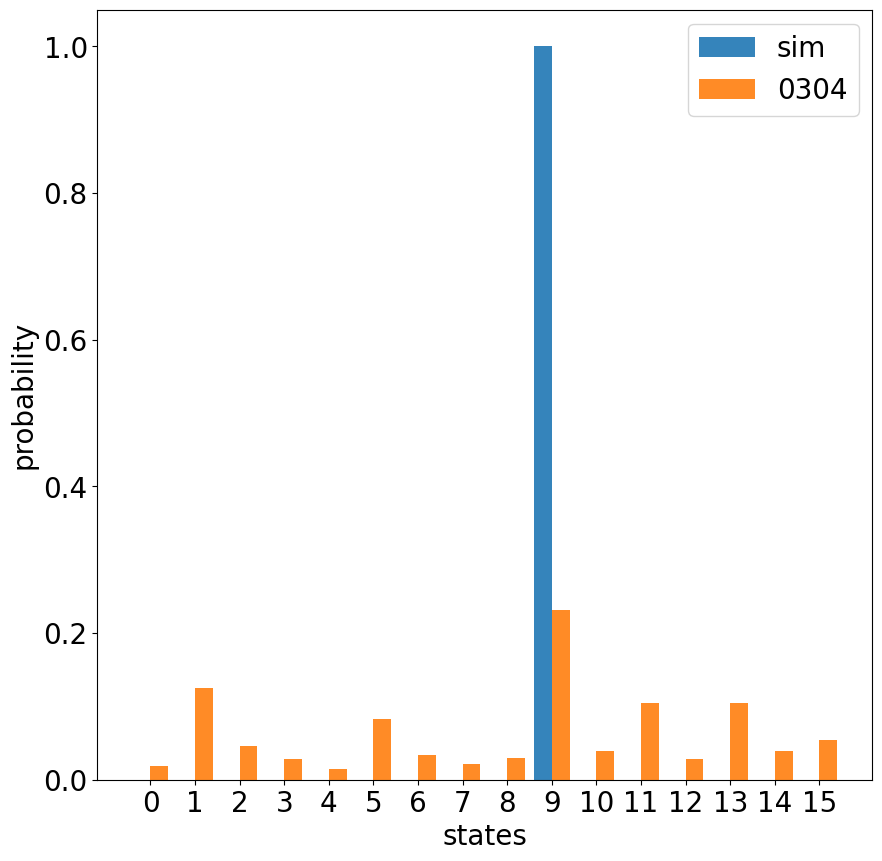

In [19]:
Set_Mapping([4,5,2,1,3])
filenames_data=[]
counts_d32=[]
counts_d32_spam=[]
counts=[]
counts_spam=[]
a=Quantum_State(5)
filenames_data=filenames_d32.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d32
circuit=c_d32

for i in range (20):
    # print (i)

    b_c.Interpret_GatesLab_Sequence(circuit[i])
    # print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    
    if (9>i>0):
        print (filenames_d32[i-1])
        a.Import(paf_data_d32+filenames_d32[i-1],keep_file=True)
        data_traced=Trace_Out(a,[0,1,2,3])
        Display_States_Population(states=[sim_traced,data_traced],label=["sim","0304"])  
    elif (i>10):
        print (filenames_d32[i-3])
        a.Import(paf_data_d32+filenames_d32[i-3],keep_file=True)
        data_traced=Trace_Out(a,[0,1,2,3])
        Display_States_Population(states=[sim_traced,data_traced],label=["sim","0304"])  
    else:
        Display_States_Population(states=[sim_traced],label=["sim"])    


        

In [13]:
import copy
from copy import copy, deepcopy
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/circuits/02062024EABmapping45213_FT/f1c90c3d-98e5-441a-b825-eca2c372abf9XX45213_FT_01+10", "rb") as fp:   # Unpickling
    eab_load = pickle.load(fp)

eab_load_cpy=deepcopy(eab_load[0:100])
eab_load_cpy_spam=deepcopy(eab_load[0:100])

In [14]:
C=20
for i in range (C):
#     print (i)
    assert eab_load_cpy[i]["L"]==2
    print (eab_load_cpy[i]["counts"])
    print (counts_d2_sim[i])

    print (counts_d2[i].copy())
    print ("\n")
    eab_load_cpy[i]["counts"]=counts_d2[i].copy()


    
# for i in range (C):
# #     print (i)
#     assert eab_load_cpy_spam[i]["L"]==2
#     eab_load_cpy_spam[i]["counts"]=counts_d2_spam[i].copy()



# for i in range (C):
#     print (eab_load_cpy[i]["counts"])
#     print (eab_load_cpy_spam[i]["counts"])

{'0000': 0, '1000': 0, '0100': 0, '1100': 0, '0010': 0, '1010': 0, '0110': 0, '1110': 0, '0001': 0, '1001': 0, '0101': 0, '1101': 0, '0011': 0, '1011': 2000, '0111': 0, '1111': 0}
{'0000': 0, '1000': 0, '0100': 0, '1100': 0, '0010': 0, '1010': 0, '0110': 0, '1110': 0, '0001': 0, '1001': 0, '0101': 0, '1101': 0, '0011': 0, '1011': 2000, '0111': 0, '1111': 0}
{'0000': 6, '1000': 12, '0100': 1, '1100': 5, '0010': 9, '1010': 59, '0110': 5, '1110': 67, '0001': 24, '1001': 102, '0101': 3, '1101': 9, '0011': 41, '1011': 1612, '0111': 3, '1111': 42}


{'0000': 0, '1000': 0, '0100': 0, '1100': 0, '0010': 0, '1010': 0, '0110': 0, '1110': 2000, '0001': 0, '1001': 0, '0101': 0, '1101': 0, '0011': 0, '1011': 0, '0111': 0, '1111': 0}
{'0000': 0, '1000': 0, '0100': 0, '1100': 0, '0010': 0, '1010': 0, '0110': 0, '1110': 2000, '0001': 0, '1001': 0, '0101': 0, '1101': 0, '0011': 0, '1011': 0, '0111': 0, '1111': 0}
{'0000': 23, '1000': 3, '0100': 18, '1100': 64, '0010': 5, '1010': 43, '0110': 47, '1110':

In [15]:
for i in range (C,2*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==4
    eab_load_cpy[i]["counts"]=counts_d4[i-C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i]["counts"])
    
# for i in range (C,2*C):
# #     print (i)
#     assert eab_load_cpy_spam[i]["L"]==4
#     eab_load_cpy_spam[i]["counts"]=counts_d4_spam[i-C].copy()

    #     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy_spam[i]["counts"])

# for i in range (C,2*C):
#     print (eab_load_cpy[i]["counts"])
#     print (eab_load_cpy_spam[i]["counts"])    

In [16]:
for i in range (2*C,3*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==8
    eab_load_cpy[i]["counts"]=counts_d8[i-2*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])

# for i in range (2*C,3*C):
# #     print (i)
#     assert eab_load_cpy_spam[i]["L"]==8
#     eab_load_cpy_spam[i]["counts"]=counts_d8_spam[i-2*C].copy()

#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy_spam[i]["counts"])

# for i in range (2*C,3*C):
#     print (eab_load_cpy[i]["counts"])
#     print (eab_load_cpy_spam[i]["counts"])    

In [17]:
# print (eab_load_cpy)

In [18]:
for i in range (3*C,4*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==16
    eab_load_cpy[i]["counts"]=counts_d16[i-3*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])

for i in range (4*C,5*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==32
    eab_load_cpy[i]["counts"]=counts_d32[i-4*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])

In [21]:
filename = str(uuid.uuid4())
filename+="XX45213_FTXX_02232024_01+10_ExperimentalData"
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0223_45213/eab_results_file/"+filename, "wb") as fp:
    pickle.dump(eab_load_cpy, fp)


Data analysis

plot average fidelity and fit

plot fidelity from each circuit and fit

data analysis with bootstrapping

spam results

In [ ]:

b=[]
c=[1,2]
f=c
c=[1]
print (d)
print (b)
print (c)